In [74]:
# Final Project - Queen Bees - Exploratory Analysis - Category 4 - Nuts & Oils
## Sara Slocum

In [208]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(PerformanceAnalytics)
library(lattice)
library(mvnormtest)
library(car)
library(fastR2)
library(caret)
library(gvlma)
library(predictmeans)
library(e1071)
library(lmtest)
library(rcompanion)
library(corrplot)
library(reshape2)

In [76]:
Nuts_Oils <- read.csv("C:/Users/saslo/Data_Science/DS_Portfolio/Queen_Bees/Datasets/Wrangled_Data/usdaNuts_Oils.csv")

In [77]:
summary(Nuts_Oils)

      X.1                X          Commodity_Description Country_Code      
 Min.   :   1.00   Min.   :   1.0   Length:186            Length:186        
 1st Qu.:  47.25   1st Qu.: 385.8   Class :character      Class :character  
 Median :  93.50   Median :2485.0   Mode  :character      Mode  :character  
 Mean   : 748.90   Mean   :3367.0                                           
 3rd Qu.: 139.75   3rd Qu.:6237.2                                           
 Max.   :8313.00   Max.   :8313.0                                           
 Country_Name            Year      Attribute_Description Unit_Description  
 Length:186         Min.   :1998   Length:186            Length:186        
 Class :character   1st Qu.:2001   Class :character      Class :character  
 Mode  :character   Median :2005   Mode  :character      Mode  :character  
                    Mean   :2005                                           
                    3rd Qu.:2008                                           
     

In [78]:
unique(Nuts_Oils$Commodity_Description)

[1] "Walnuts, Inshell Basis"    "Pistachios, Inshell Basis"
 [3] "Pecans, Inshell Basis"     "Macadamia, Inshell Basis" 
 [5] "Filberts, Inshell Basis"   "Almonds, Shelled Basis"   
 [7] "Oil, Sunflowerseed"        "Oil, Soybean"             
 [9] "Oil, Rapeseed"             "Oil, Peanut"              
[11] "Oil, Olive"                "Oil, Cottonseed"          
[13] "Honey"

In [79]:
AveVals <- Nuts_Oils %>% group_by(Commodity_Description) %>% summarize(ave.val = mean(Value));
AveVals <- as.data.frame(AveVals)
AveVals

Commodity_Description,ave.val
<chr>,<dbl>
"Almonds, Shelled Basis",552810.667
"Filberts, Inshell Basis",32870.400
Honey,78920.064
"Macadamia, Inshell Basis",24243.800
"Oil, Cottonseed",392200.000
"Oil, Olive",2733.333
"Oil, Peanut",88200.000
"Oil, Rapeseed",419666.667
"Oil, Soybean",8757933.333


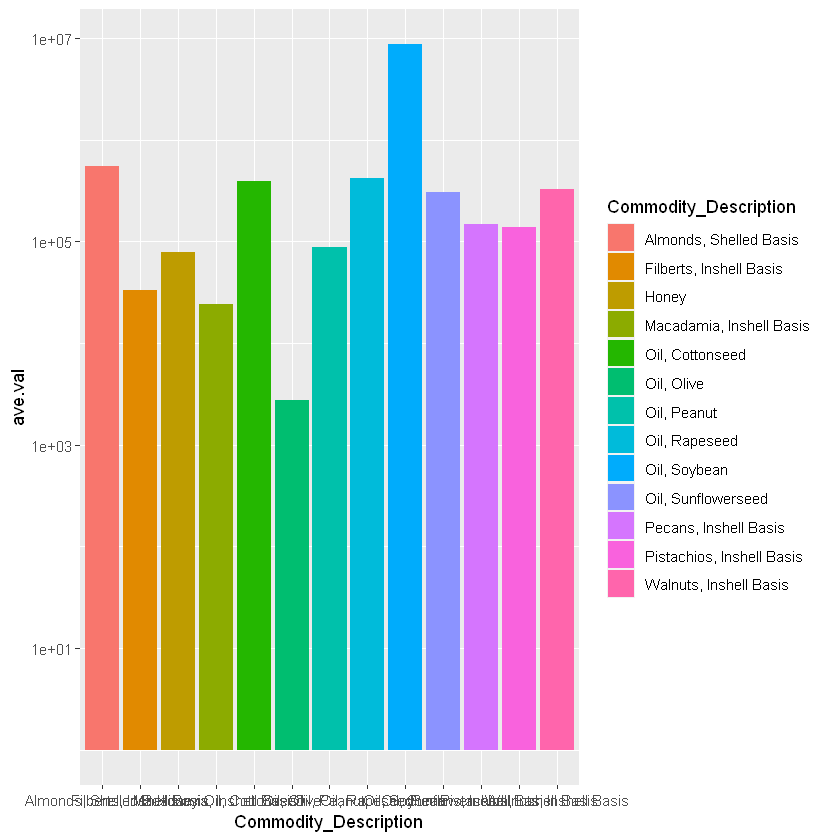

In [80]:
AveBAR <- ggplot(data = AveVals, aes(x = Commodity_Description, y = ave.val , fill = Commodity_Description)) +
  geom_bar(stat = "identity", position = position_dodge(), alpha = 1)+
  scale_y_log10()
AveBAR

In [81]:
## We know that some of our data is missing for some of the nuts, but it looks like on Average from 1998-2012, the biggest Nut & Oil commodities produced by the US were
### 1 - Soybean Oil (by a long shot)
### 2 - Almonds
### 3 - Rapeseed Oil
### 4 - Cottonseed Oil
### 5 - Walnuts

In [82]:
# ----------------------------------------------------------------------------------------
# Does honey production correlate with the production of any other USDA commodities in this category? Which are more highly correlated?

In [83]:
## Transposing & Reshaping Data
testTranspose <- Nuts_Oils
colnames(testTranspose)

[1] "X.1"                   "X"                     "Commodity_Description"
 [4] "Country_Code"          "Country_Name"          "Year"                 
 [7] "Attribute_Description" "Unit_Description"      "Value"                
[10] "Category"

In [84]:
### Deleting non-essential columns
Nuts_Oils2 <- testTranspose[, c('Commodity_Description', 'Year', 'Value')];
Nuts_Oils2 

Commodity_Description,Year,Value
<chr>,<int>,<dbl>
"Walnuts, Inshell Basis",1998,205931
"Walnuts, Inshell Basis",1999,256734
"Walnuts, Inshell Basis",2000,216816
"Walnuts, Inshell Basis",2001,276700
"Walnuts, Inshell Basis",2002,255825
"Walnuts, Inshell Basis",2003,295741
"Walnuts, Inshell Basis",2004,294834
"Walnuts, Inshell Basis",2005,322100
"Walnuts, Inshell Basis",2006,317515


In [85]:
### Isolating Year column
Nuts_OilsYear <- testTranspose[, c('Year')]
Nuts_OilsYear <- as.data.frame(Nuts_OilsYear)

In [86]:
###  Creating one row per year
Nuts_OilsYear <- Nuts_OilsYear[1:15,]
Nuts_OilsYear <- as.data.frame(Nuts_OilsYear)
Nuts_OilsYear

Nuts_OilsYear
<int>
1998
1999
2000
2001
2002
2003
2004
2005
2006


In [87]:
### Creating subset of only commodity and value
ComVal <- testTranspose[, c('Commodity_Description', 'Value')]

In [88]:
### Isolating Commodities
AlmondsTR <- subset(ComVal, Commodity_Description=='Almonds, Shelled Basis')
FilbertsTR <- subset(ComVal, Commodity_Description=='Filberts, Inshell Basis')
HoneyTR <- subset(ComVal, Commodity_Description=='Honey')
MacadamiaTR <- subset(ComVal, Commodity_Description=='Macadamia, Inshell Basis')
CottonseedOilTR <- subset(ComVal, Commodity_Description=='Oil, Cottonseed')
OliveOilTR <- subset(ComVal, Commodity_Description=='Oil, Olive')
PeanutOilTR <- subset(ComVal, Commodity_Description=='Oil, Peanut')
RapeseedOilTR <- subset(ComVal, Commodity_Description=='Oil, Rapeseed')
SoybeanOilTR <- subset(ComVal, Commodity_Description=='Oil, Soybean')
SunflowerseedOilTR <- subset(ComVal, Commodity_Description=='Oil, Sunflowerseed')
PecansTR <- subset(ComVal, Commodity_Description=='Pecans, Inshell Basis')
PistachiosTR <- subset(ComVal, Commodity_Description=='Pistachios, Inshell Basis')
WalnutsTR <- subset(ComVal, Commodity_Description=='Walnuts, Inshell Basis')

In [89]:
### Had to drop Commodity Columns with missing data - Macadamias & Pecans

In [90]:
### Creating new columns in new dataframe for each commodity production value
Nuts_OilsYear$Almonds <- AlmondsTR$Value
Nuts_OilsYear$Filberts <- FilbertsTR$Value
Nuts_OilsYear$Honey <- HoneyTR$Value
Nuts_OilsYear$CottonseedOil <- CottonseedOilTR$Value
Nuts_OilsYear$OliveOil <- OliveOilTR$Value
Nuts_OilsYear$PeanutOil <- PeanutOilTR$Value
Nuts_OilsYear$RapeseedOil <- RapeseedOilTR$Value
Nuts_OilsYear$SoybeanOil <- SoybeanOilTR$Value
Nuts_OilsYear$SunflowerseedOil <- SunflowerseedOilTR$Value
Nuts_OilsYear$Pistachios <- PistachiosTR$Value
Nuts_OilsYear$Walnuts <- WalnutsTR$Value

Nuts_OilsYear

Nuts_OilsYear,Almonds,Filberts,Honey,CottonseedOil,OliveOil,PeanutOil,RapeseedOil,SoybeanOil,SunflowerseedOil,Pistachios,Walnuts
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1998,235884,14061,99571.62,377000,1000,66000,290000,8202000,534000,85275,205931
1999,377800,34500,91800.72,426000,1000,104000,319000,8085000,478000,56056,256734
2000,318900,20471,99589.31,384000,1000,81000,345000,8355000,396000,110179,216816
2001,376500,44906,84253.44,398000,1000,104000,287000,8572000,319000,73240,276700
2002,494416,17700,77684.09,329000,1000,130000,243000,8360000,145000,137562,255825
2003,471740,34400,82268.53,396000,2000,79000,291000,7748000,270000,53970,295741
2004,462664,48502,82884.05,434000,2000,57000,378000,8782000,120000,157400,294834
2005,415040,33566,78910.60,435000,3000,82000,421000,9250000,251000,128400,322100
2006,508023,39010,69960.81,408000,1000,97000,461000,9294000,294000,107955,317515


In [91]:
## Running Correlation Matrix

Nuts_OilsCoR <- cor(Nuts_OilsYear)
Nuts_OilsCoR

,Nuts_OilsYear,Almonds,Filberts,Honey,CottonseedOil,OliveOil,PeanutOil,RapeseedOil,SoybeanOil,SunflowerseedOil,Pistachios,Walnuts
Nuts_OilsYear,1.000000000,0.9407896,0.34991550,-0.8689871,-0.137352432,0.7794600,0.007762914,0.929102258,0.62634519,-0.44432312,0.834597560,0.94677464
Almonds,0.940789607,1.0000000,0.25350819,-0.8131253,-0.283763867,0.8246517,0.184670719,0.874562584,0.49456802,-0.39391457,0.810187708,0.91907188
Filberts,0.349915501,0.2535082,1.00000000,-0.4795075,0.588556948,0.1709633,-0.186564945,0.286686065,0.31146897,-0.38636485,0.074365482,0.32958140
Honey,-0.868987121,-0.8131253,-0.47950753,1.0000000,0.146092704,-0.5623766,-0.186057369,-0.734580395,-0.67450636,0.54468612,-0.630911946,-0.74211601
CottonseedOil,-0.137352432,-0.2837639,0.58855695,0.1460927,1.000000000,-0.1580972,-0.462048010,-0.002311856,0.13849817,0.06535953,-0.282837498,-0.11058675
OliveOil,0.779459959,0.8246517,0.17096327,-0.5623766,-0.158097161,1.0000000,0.102236380,0.774680345,0.24530174,-0.25258042,0.794457841,0.79858204
PeanutOil,0.007762914,0.1846707,-0.18656494,-0.1860574,-0.462048010,0.1022364,1.000000000,-0.098584114,-0.05519243,-0.16709765,-0.008117979,0.05745279
RapeseedOil,0.929102258,0.8745626,0.28668607,-0.7345804,-0.002311856,0.7746803,-0.098584114,1.000000000,0.68943710,-0.17906855,0.822682987,0.87493529
SoybeanOil,0.626345194,0.4945680,0.31146897,-0.6745064,0.138498172,0.2453017,-0.055192431,0.689437097,1.00000000,-0.30423382,0.517375064,0.45701620
SunflowerseedOil,-0.444323124,-0.3939146,-0.38636485,0.5446861,0.065359528,-0.2525804,-0.167097654,-0.179068552,-0.30423382,1.00000000,-0.410740540,-0.33084246


In [92]:
### Looks like honey is significantly negatively correlated with Almonds at -81%! 

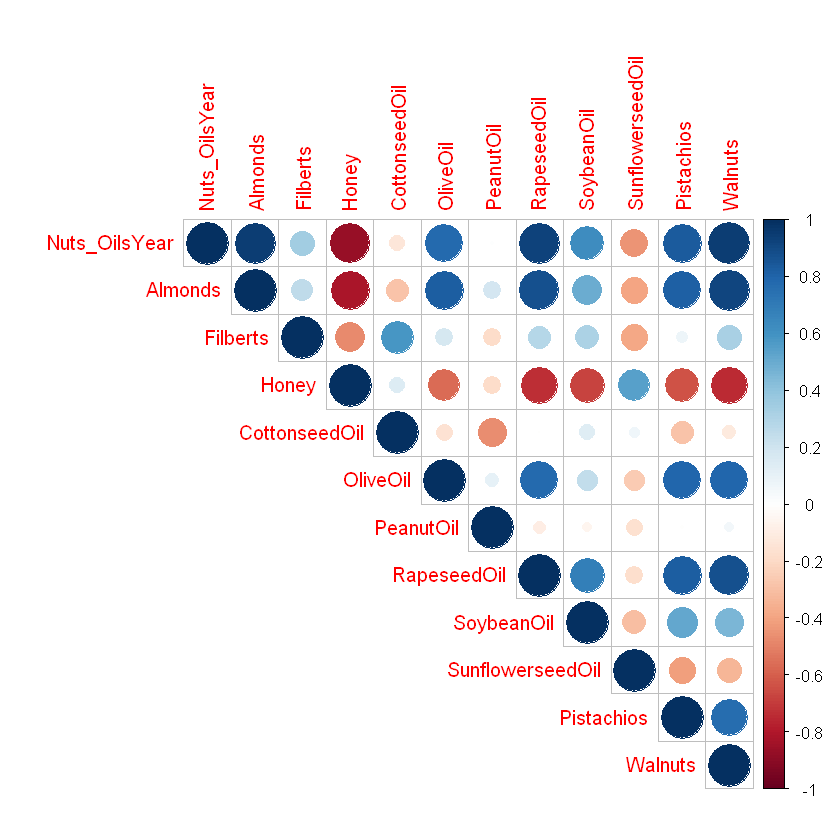

In [93]:
## Visualizing Matrix
corrplot(Nuts_OilsCoR, type="upper", method="circle")

In [94]:
### Looks like overall, Honey production plays a large influence in the pollenization of nut-producing plants!

In [95]:
# -----------------------------------------------------------------------------------------------------------------
# Running Linear Regressions on Highly Correlated Commodity - Almonds 
## 1 - How do Almond production values change from 2008-2012?
## 2 - What is the equation of the linear relationship between Almonds and honey from 1998-2012?

In [96]:
## 1 - How do Almond production values change from 2008-2012?
## Filtering out only almonds
AlmondsTimeLR <- subset(Nuts_Oils, Commodity_Description=='Almonds, Shelled Basis')
AlmondsTimeLR

,X.1,X,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>
67,67,1,"Almonds, Shelled Basis",US,United States,1998,Production,(MT),235884,4
68,68,6883,"Almonds, Shelled Basis",US,United States,1999,Production,(MT),377800,4
69,69,6884,"Almonds, Shelled Basis",US,United States,2000,Production,(MT),318900,4
70,70,6228,"Almonds, Shelled Basis",US,United States,2001,Production,(MT),376500,4
71,71,5,"Almonds, Shelled Basis",US,United States,2002,Production,(MT),494416,4
72,72,5347,"Almonds, Shelled Basis",US,United States,2003,Production,(MT),471740,4
73,73,7,"Almonds, Shelled Basis",US,United States,2004,Production,(MT),462664,4
74,74,3214,"Almonds, Shelled Basis",US,United States,2005,Production,(MT),415040,4
75,75,6890,"Almonds, Shelled Basis",US,United States,2006,Production,(MT),508023,4


`geom_smooth()` using formula 'y ~ x'



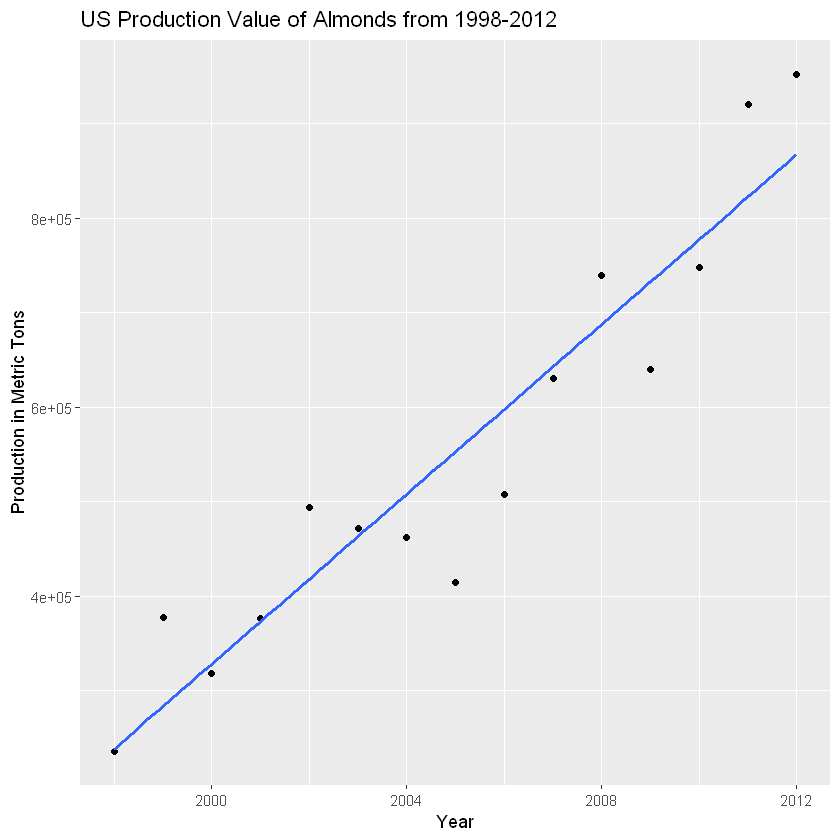

In [97]:
## Creating a scatterplot with best line fit
AlmondsTimeSCAT <- ggplot(AlmondsTimeLR, aes(x = Year, y = Value))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Almonds from 1998-2012')+
                xlab('Year')+
                ylab('Production in Metric Tons')
AlmondsTimeSCAT

In [98]:
### As we can see, there is a positive linear relationship between Almond production and time

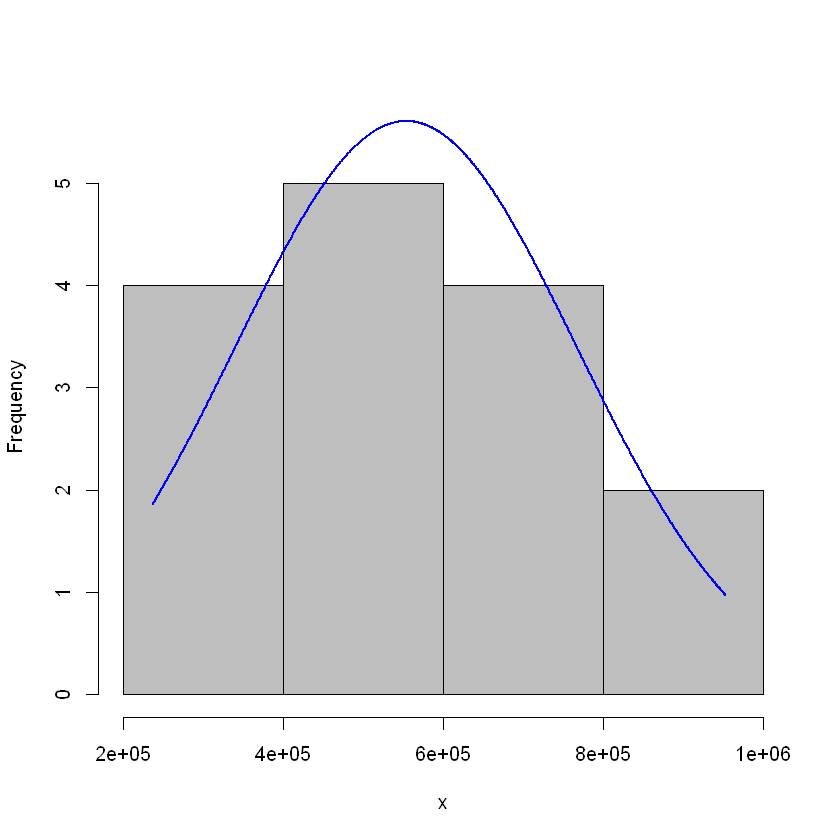

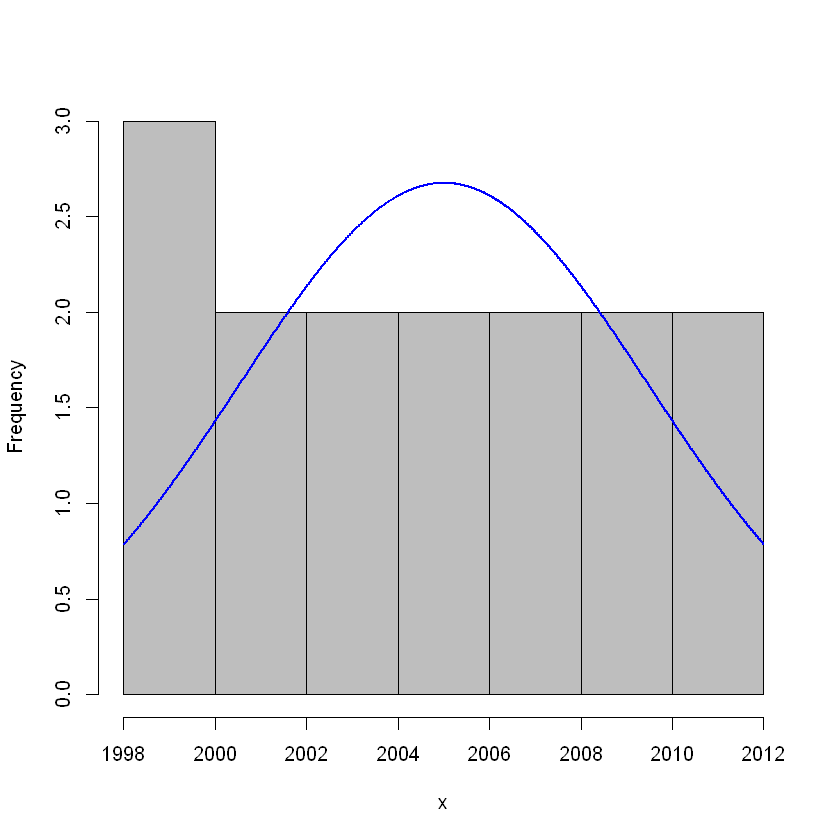

In [99]:
## Testing for Normality
plotNormalHistogram(AlmondsTimeLR$Value)
plotNormalHistogram(AlmondsTimeLR$Year)

In [100]:
### They both look decently distributed!

In [101]:
## Looking at Pearson's correlation
cor.test(AlmondsTimeLR$Year, AlmondsTimeLR$Value, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  x and y
t = 10.006, df = 13, p-value = 1.786e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8271625 0.9805125
sample estimates:
      cor 
0.9407896 


In [102]:
### We see here there is a significant correlation between almonds production and time from 1998 - 2012. At 98% we can be fairly confident of this correlation!

In [103]:
## Running linear regression model
lin_reg1 <- lm(Value ~ Year, AlmondsTimeLR)
print(lin_reg1)


Call:
lm(formula = Value ~ Year, data = AlmondsTimeLR)

Coefficients:
(Intercept)         Year  
  -89472112        44900  



In [104]:
### Our equation for Almonds looks like: y = 44900(Year) - 89472112. 

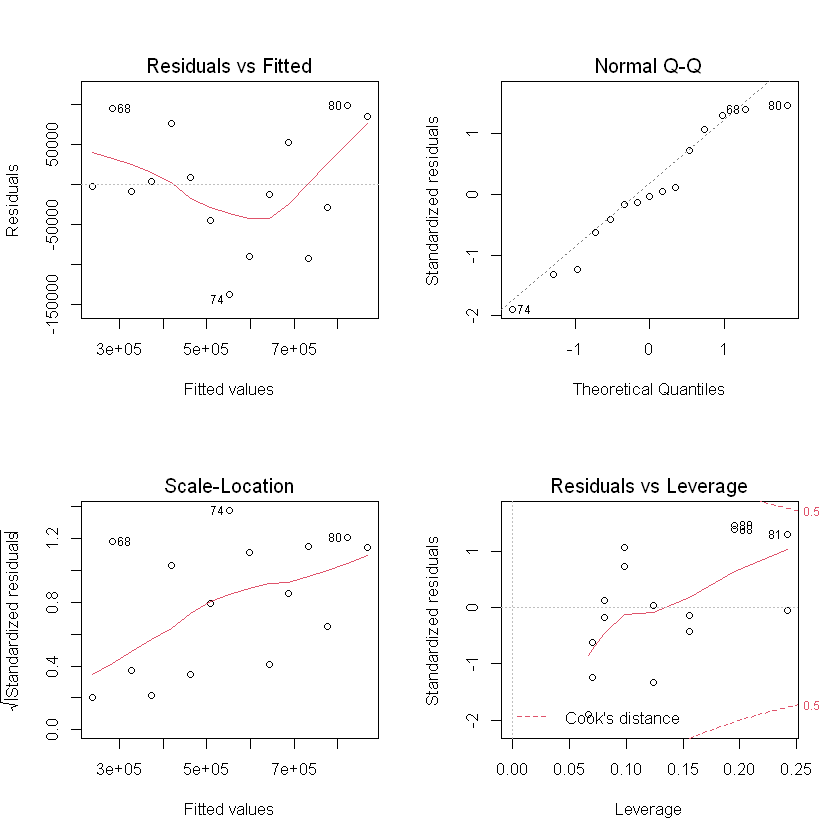

In [206]:
## Testing for Homoscedasticity & Homogeneity of Variance
par(mfrow=c(2,2))
plot(lin_reg1)

In [193]:
### Luckily we see no cone shapes, so we have passe the test for Homogeneity of Variance
### However, This data looks heteroscedastic, let's confirm...
lmtest::bptest(lin_reg1)


	studentized Breusch-Pagan test

data:  lin_reg1
BP = 1.0652, df = 1, p-value = 0.302


In [194]:
### Fortunately, it looks like our Breusch-Pagan test is not significant and we have passed the assumption for homoscedasticity!
### Let's triple check
car::ncvTest(lin_reg1)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.6161554, Df = 1, p = 0.43248

In [210]:
### Not significant! Moving forward...

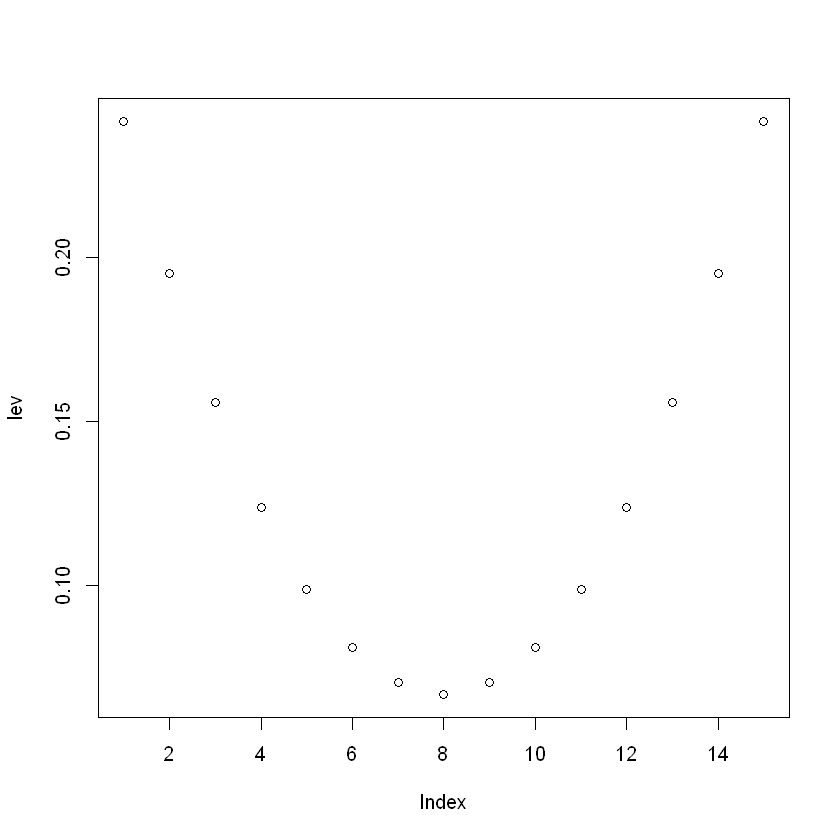

In [200]:
## Screening for outliers
lev = hat(model.matrix(lin_reg1))
plot(lev)

In [204]:
### Looks like we may have two points that are a problem. 
summary(influence.measures(lin_reg1))

Potentially influential observations of
	 lm(formula = Value ~ Year, data = AlmondsTimeLR) :

   dfb.1_ dfb.Year dffit cov.r   cook.d hat  
67 -0.02   0.02    -0.02  1.55_*  0.00   0.24


In [205]:
### DFFITS and DFBETAS values under 1... Luckily no significant influential outliers here!

In [105]:
## Model Summary
summary(lin_reg1)


Call:
lm(formula = Value ~ Year, data = AlmondsTimeLR)

Residuals:
    Min      1Q  Median      3Q     Max 
-137771  -37064   -2625   64097   98588 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -89472112    8996794  -9.945 1.92e-07 ***
Year            44900       4487  10.006 1.79e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 75080 on 13 degrees of freedom
Multiple R-squared:  0.8851,	Adjusted R-squared:  0.8762 
F-statistic: 100.1 on 1 and 13 DF,  p-value: 1.786e-07


In [106]:
### We can see here that year is a significant predictor of production value, after looking at adjusted R-squared we see that year accounts for 87% of production value. 

In [107]:
## - 2 What is the equation of the linear relationship between Almonds and honey from 1998-2012?

`geom_smooth()` using formula 'y ~ x'



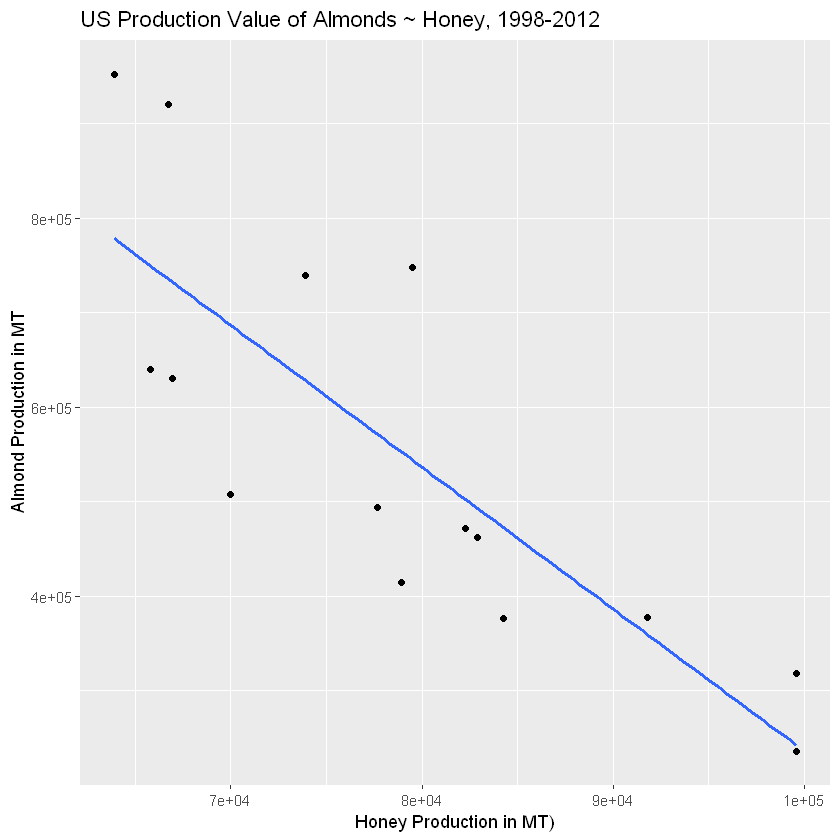

In [108]:
## Creating a scatterplot with best line fit
AlmondsHoneySCAT <- ggplot(Nuts_OilsYear, aes(x = Honey, y = Almonds))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Almonds ~ Honey, 1998-2012')+
                xlab('Honey Production in MT)')+
                ylab('Almond Production in MT')
AlmondsHoneySCAT

In [109]:
### Looks like a direct negative correlation, matching the data we found in our correlation matrix

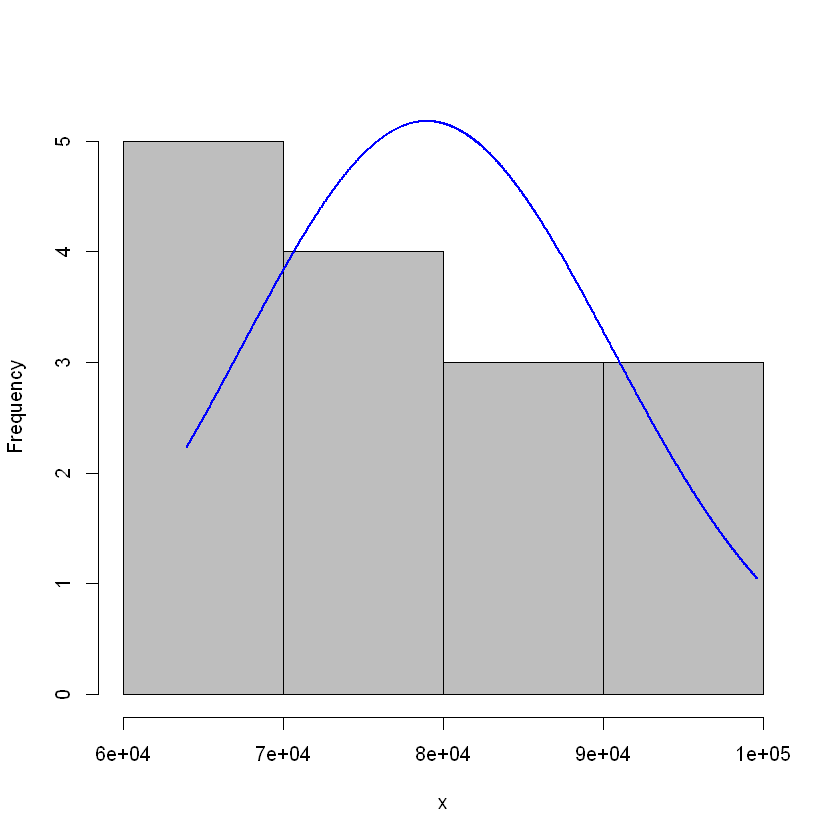

In [110]:
## Looking at distribution of Honey production data
plotNormalHistogram(Nuts_OilsYear$Honey)

In [111]:
### Not too bad, we'll go with it!

In [112]:
## Running Pearson's correlation
cor.test(Nuts_OilsYear$Honey, Nuts_OilsYear$Almonds, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  x and y
t = -5.0366, df = 13, p-value = 0.0002277
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9356558 -0.5156468
sample estimates:
       cor 
-0.8131253 


In [113]:
### There is a significant negative correlation between the production of Honey and Almonds. We expected a high correlation, but a positive one. At 52% adjusted confidence interval, there could be other major 
### factors coming in to play. This could possibly explain the negative correlation. We will have to expand our research to discover why this is the case.

In [114]:
## Running linear regression model
lin_reg2 <- lm(Almonds ~ Honey, Nuts_OilsYear)
print(lin_reg2)


Call:
lm(formula = Almonds ~ Honey, data = Nuts_OilsYear)

Coefficients:
(Intercept)        Honey  
 1737890.72       -15.02  



In [115]:
### Our equation for Almonds ~ Honey production is: y = -15.02(Honey) + 1737890.72. We will use this equation for predictive modeling later on!

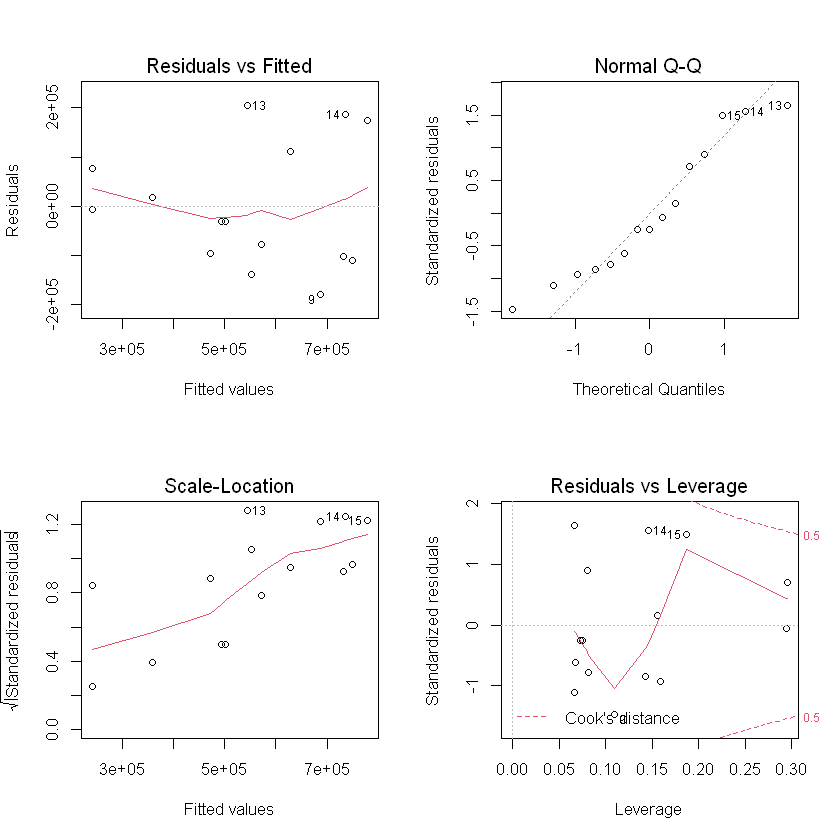

In [207]:
## Testing for Homoscedasticity & Homogeneity of Variance
par(mfrow=c(2,2))
plot(lin_reg2)

In [214]:
### There could be a slight cone shape, but we will ignore and move forward.
### Red lines are not flat, so we will have to further investigate our assumption of homoscedasticity.
lmtest::bptest(lin_reg2)


	studentized Breusch-Pagan test

data:  lin_reg2
BP = 5.0732, df = 1, p-value = 0.0243


In [216]:
### Unfortunately, this our Breusch-Pagan test is significant, we may have to transform our data. Let's run it through one more test!
car::ncvTest(lin_reg2)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 2.206234, Df = 1, p = 0.13745

In [217]:
### Not significant! Moving forward...

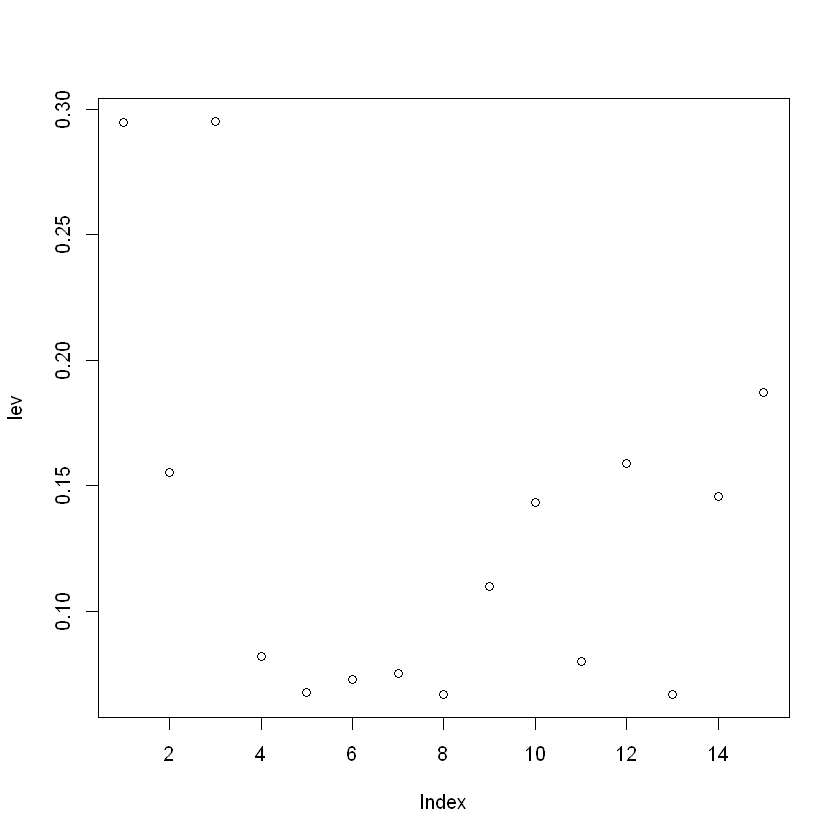

In [218]:
## Screening for outliers
lev = hat(model.matrix(lin_reg2))
plot(lev)

In [220]:
### Looks like we may have two points that are a problem. 
summary(influence.measures(lin_reg2))

Potentially influential observations of
	 lm(formula = Almonds ~ Honey, data = Nuts_OilsYear) :

  dfb.1_ dfb.Hony dffit cov.r   cook.d hat  
1  0.03  -0.03    -0.04  1.66_*  0.00   0.29
3 -0.36   0.39     0.45  1.54_*  0.10   0.30


In [221]:
### Neither are over 1, so we can leave them in there!

In [116]:
## Model Summary
summary(lin_reg2)


Call:
lm(formula = Almonds ~ Honey, data = Nuts_OilsYear)

Residuals:
    Min      1Q  Median      3Q     Max 
-179322  -99072  -30623   94004  204502 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.738e+06  2.376e+05   7.313 5.89e-06 ***
Honey       -1.502e+01  2.981e+00  -5.037 0.000228 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 128900 on 13 degrees of freedom
Multiple R-squared:  0.6612,	Adjusted R-squared:  0.6351 
F-statistic: 25.37 on 1 and 13 DF,  p-value: 0.0002277


In [117]:
### Our p-value is signifcant, meaning there is a significant influence of Honey to Almond production. Our adjusted R-squared value tells us that Honey production accounts for 63% of Almond production value.

In [118]:
# -----------------------------------------------------------------------------------------------------------------
# Running Linear Regressions on Highly Correlated Commodity - Walnuts 
## 1 - How does Walnut production values change from 2008-2012?
## 2 - What is the equation of the linear relationship between Walnuts and honey from 1998-2012?

In [119]:
## 1 - How does Walnut production values change from 2008-2012?
## Filtering out only walnuts
WalnutsTimeLR <- subset(Nuts_Oils, Commodity_Description=='Walnuts, Inshell Basis')
WalnutsTimeLR

,X.1,X,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>
1,1,602,"Walnuts, Inshell Basis",US,United States,1998,Production,(MT),205931,4
2,2,603,"Walnuts, Inshell Basis",US,United States,1999,Production,(MT),256734,4
3,3,604,"Walnuts, Inshell Basis",US,United States,2000,Production,(MT),216816,4
4,4,6357,"Walnuts, Inshell Basis",US,United States,2001,Production,(MT),276700,4
5,5,606,"Walnuts, Inshell Basis",US,United States,2002,Production,(MT),255825,4
6,6,607,"Walnuts, Inshell Basis",US,United States,2003,Production,(MT),295741,4
7,7,608,"Walnuts, Inshell Basis",US,United States,2004,Production,(MT),294834,4
8,8,6361,"Walnuts, Inshell Basis",US,United States,2005,Production,(MT),322100,4
9,9,1249,"Walnuts, Inshell Basis",US,United States,2006,Production,(MT),317515,4


`geom_smooth()` using formula 'y ~ x'



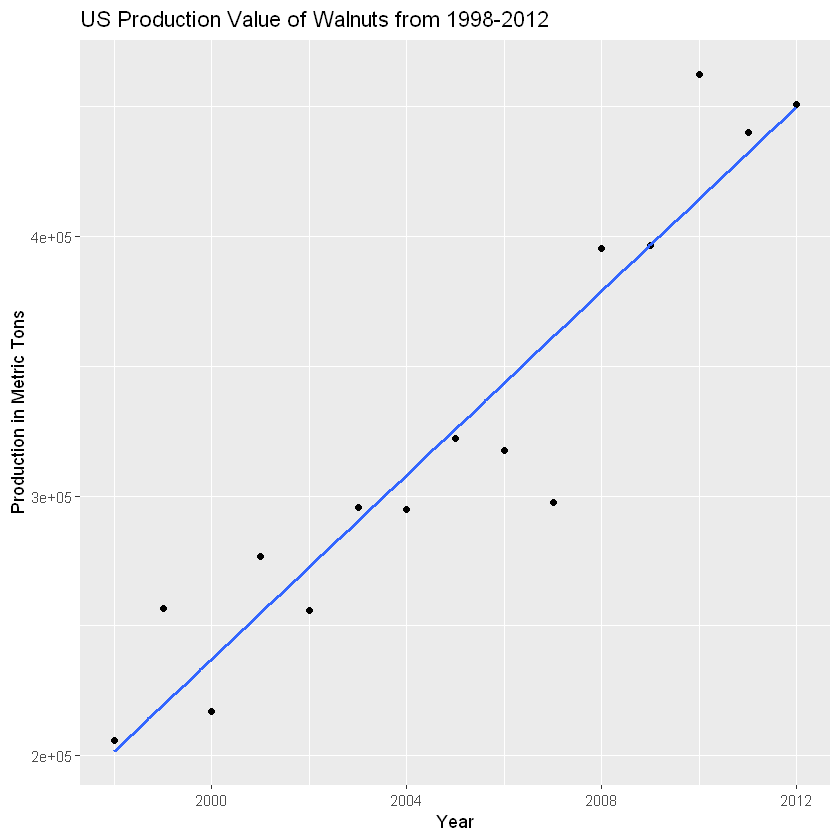

In [120]:
## Creating a scatterplot with best line fit
WalnutsTimeSCAT <- ggplot(WalnutsTimeLR, aes(x = Year, y = Value))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Walnuts from 1998-2012')+
                xlab('Year')+
                ylab('Production in Metric Tons')
WalnutsTimeSCAT

In [121]:
### We see a positive linear relationship, with Walnut production increasing over time

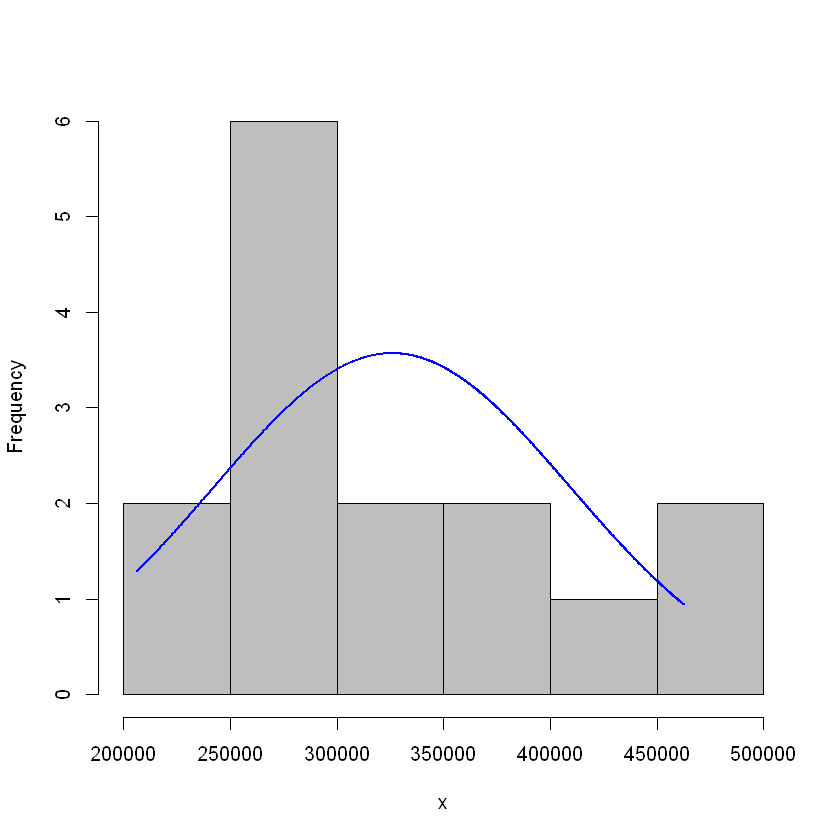

In [122]:
## Testing for Normality
plotNormalHistogram(WalnutsTimeLR$Value)

In [123]:
### Looks skewed to the left a bit but the line is telling us its not too bad

In [124]:
## Looking at Pearson's correlation
cor.test(WalnutsTimeLR$Year, WalnutsTimeLR$Value, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  x and y
t = 10.605, df = 13, p-value = 9.066e-08
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8437081 0.9825185
sample estimates:
      cor 
0.9467746 


In [125]:
### Another very significant correlation with a high confidence interval of 98%

In [127]:
## Running linear regression model
lin_reg3 <- lm(Value ~ Year, WalnutsTimeLR)
print(lin_reg3)


Call:
lm(formula = Value ~ Year, data = WalnutsTimeLR)

Coefficients:
(Intercept)         Year  
  -35246026        17741  



In [128]:
### Our equation for Walnuts over time looks like: y = 17741(Year) - 35246026. 

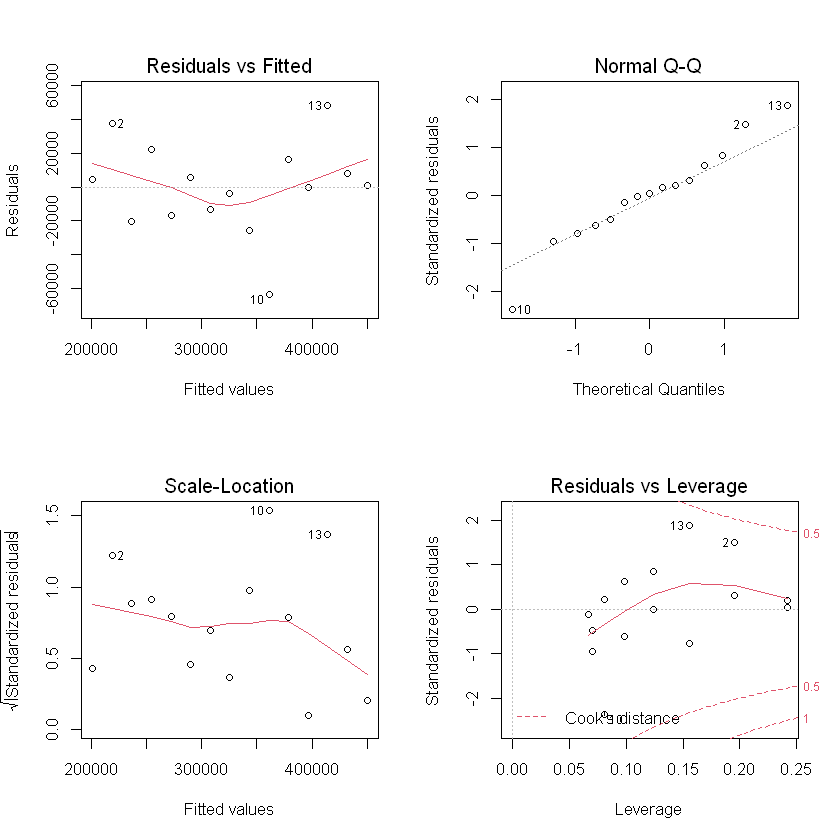

In [222]:
## Testing for Homoscedasticity & Homogeneity of Variance
par(mfrow=c(2,2))
plot(lin_reg3)

In [225]:
### Homogeneity looks alright. We will have to run some further testing to observe Homoscedasticity or Heteroscedasticity
lmtest::bptest(lin_reg3)


	studentized Breusch-Pagan test

data:  lin_reg3
BP = 0.19224, df = 1, p-value = 0.6611


In [226]:
### Not significant! Our data seems to pass the assumption for Homoscedasticity, but let's run one more test just to make sure
car::ncvTest(lin_reg3)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2479494, Df = 1, p = 0.61852

In [ ]:
### Also not significant! We are good to go. 

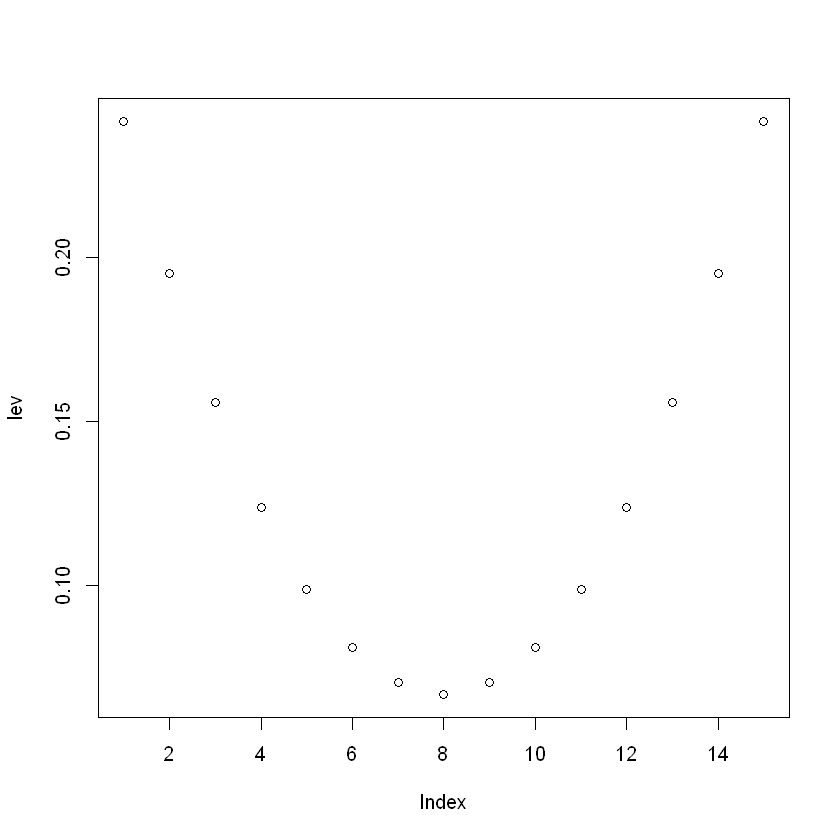

In [233]:
## Testing for Outliers
lev = hat(model.matrix(lin_reg3))
plot(lev)

In [228]:
### Some look high so let's dig further
summary(influence.measures(lin_reg3))

Potentially influential observations of
	 lm(formula = Value ~ Year, data = WalnutsTimeLR) :

   dfb.1_ dfb.Year dffit cov.r   cook.d hat  
1   0.08  -0.08     0.10  1.54_*  0.01   0.24
10  0.37  -0.38    -0.90  0.41_*  0.25   0.08
15 -0.02   0.02     0.02  1.55_*  0.00   0.24


In [229]:
### Close, but there are no 1s in our DFFITS or DFBETAS columnds so we are good to go with the data!

In [129]:
## Model Summary
summary(lin_reg3)


Call:
lm(formula = Value ~ Year, data = WalnutsTimeLR)

Residuals:
   Min     1Q Median     3Q    Max 
-63565 -14869    999  12231  48271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -35246026    3354321  -10.51 1.01e-07 ***
Year            17742       1673   10.61 9.07e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27990 on 13 degrees of freedom
Multiple R-squared:  0.8964,	Adjusted R-squared:  0.8884 
F-statistic: 112.5 on 1 and 13 DF,  p-value: 9.066e-08


In [130]:
### The results of this analysis show that year is a significant predictor of Walnut production in the US, accounting for 89% of production value!

In [131]:
## - 2 What is the equation of the linear relationship between Walnuts and honey from 1998-2012?

`geom_smooth()` using formula 'y ~ x'



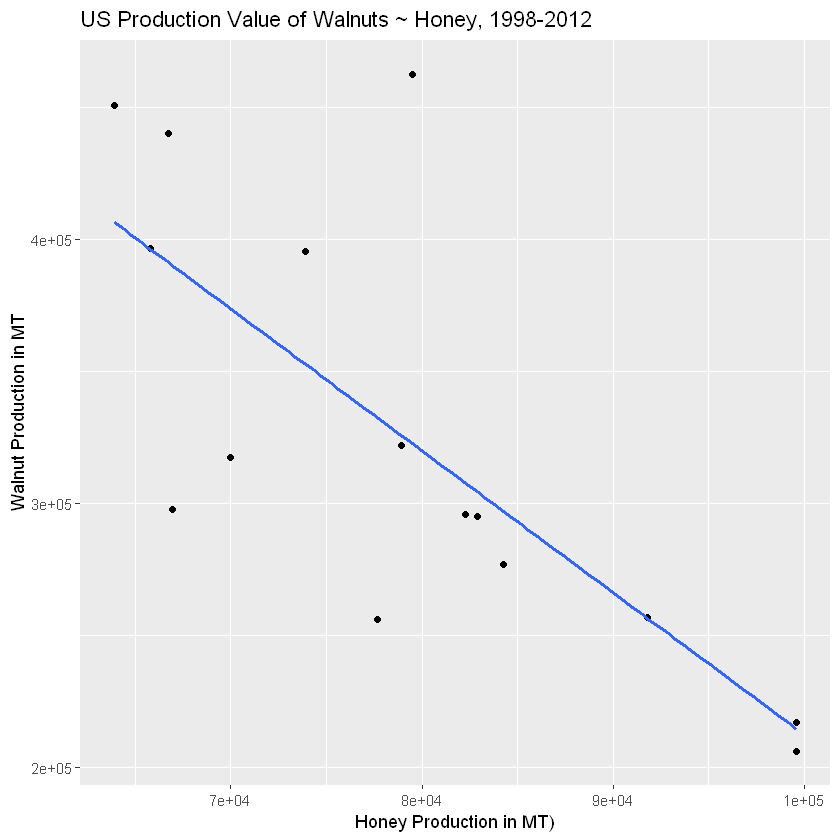

In [132]:
## Creating a scatterplot with best line fit
WalnutsHoneySCAT <- ggplot(Nuts_OilsYear, aes(x = Honey, y = Walnuts))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Walnuts ~ Honey, 1998-2012')+
                xlab('Honey Production in MT)')+
                ylab('Walnut Production in MT')
WalnutsHoneySCAT

In [133]:
### Looks like a clear negative correlation, with a lot of variance in the beginning. We already know honey is normally distributed, so we will proceed to the next assumption.

In [134]:
## Running Pearson's correlation
cor.test(Nuts_OilsYear$Honey, Nuts_OilsYear$Walnuts, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  x and y
t = -3.992, df = 13, p-value = 0.001535
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9088658 -0.3708257
sample estimates:
      cor 
-0.742116 


In [149]:
### We can see there is a significant negative correlation between Honey and Walnut production in the US. However, the 37% adjusted confidence interval if fairly low, there are clearly other major 
### factors coming in to play. 

In [136]:
## Running linear regression model
lin_reg4 <- lm(Walnuts ~ Honey, Nuts_OilsYear)
print(lin_reg4)


Call:
lm(formula = Walnuts ~ Honey, data = Nuts_OilsYear)

Coefficients:
(Intercept)        Honey  
 750350.122       -5.381  



In [1]:
### Our linear equation for Walnuts ~ Honey is Walnuts = -5.381(Honey) + 750350.122

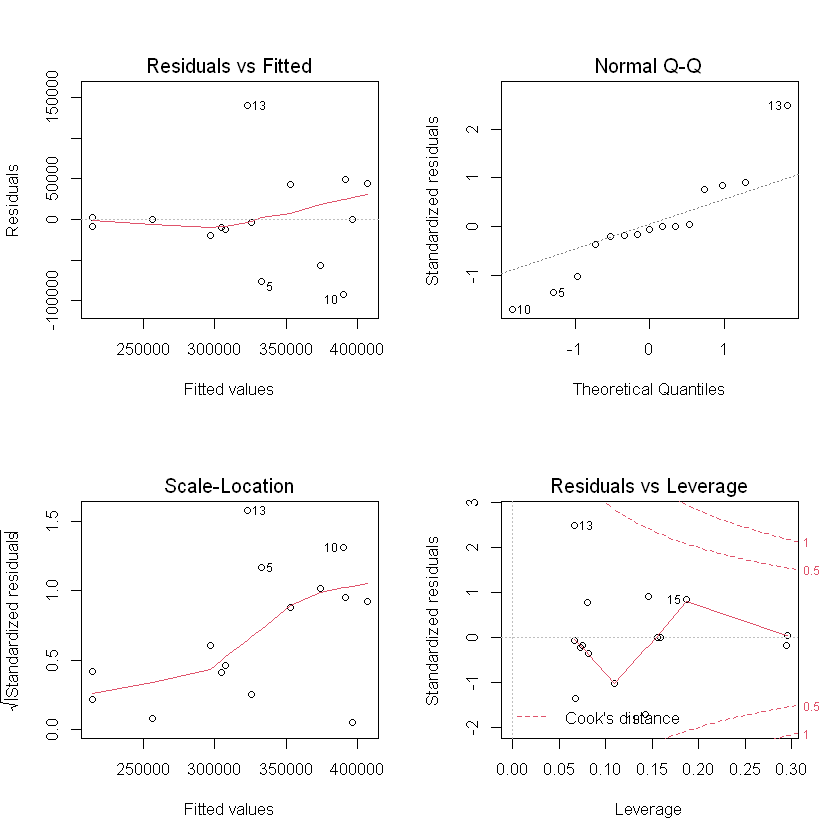

In [230]:
## Testing for Homoscedasticity & Homogeneity of Variance
par(mfrow=c(2,2))
plot(lin_reg4)

In [231]:
### There are some cone-shapes in our residuals plots, which leads me to assume we have not passed the assumption of Homogeneity. For the purpose of this project, we will move forward with the analysis, but note that it is something to be adjusted in a higher-stake setting. 
### Heteroscedasticity is unclear, so we will run a Breusch-Pagan test. 
lmtest::bptest(lin_reg4)


	studentized Breusch-Pagan test

data:  lin_reg4
BP = 0.74575, df = 1, p-value = 0.3878


In [232]:
### Not significant! Let's double check
car::ncvTest(lin_reg4)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.10786, Df = 1, p = 0.29255

In [ ]:
### Also not significant! Great!

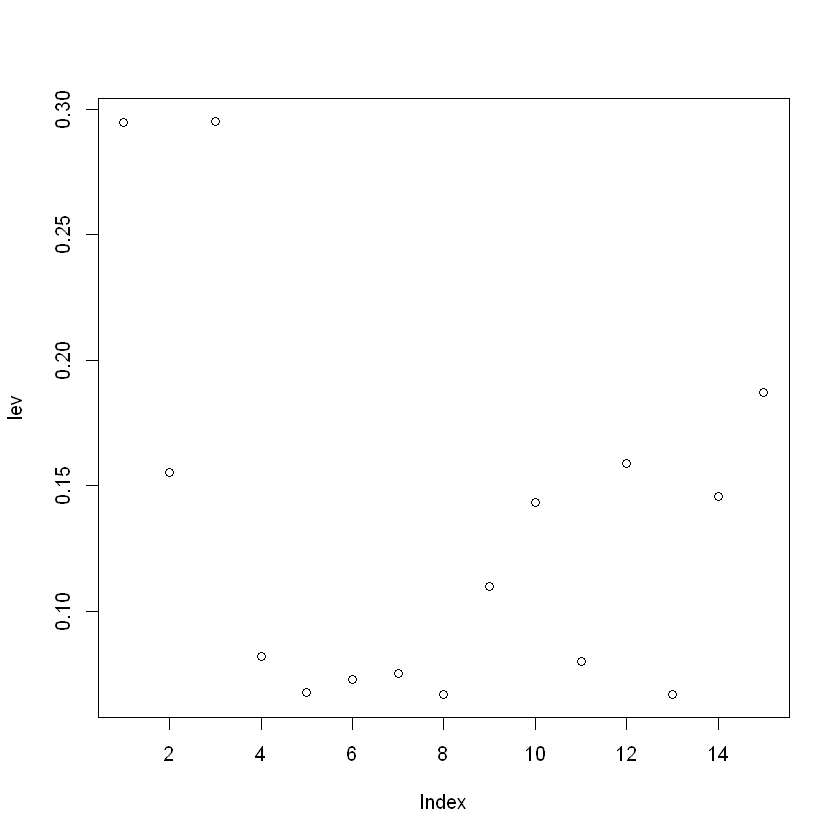

In [236]:
## Screening for Outliers
lev = hat(model.matrix(lin_reg4))
plot(lev)

In [235]:
### Some outliers coming really close to 3...
summary(influence.measures(lin_reg4))

Potentially influential observations of
	 lm(formula = Walnuts ~ Honey, data = Nuts_OilsYear) :

   dfb.1_ dfb.Hony dffit cov.r   cook.d hat  
1   0.09  -0.10    -0.11  1.66_*  0.01   0.29
3  -0.02   0.03     0.03  1.66_*  0.00   0.30
13  0.08   0.05     0.88  0.34_*  0.22   0.07


In [237]:
### Again, nothing over 1! We're getting lucky here...

In [138]:
summary(lin_reg4)


Call:
lm(formula = Walnuts ~ Honey, data = Nuts_OilsYear)

Residuals:
   Min     1Q Median     3Q    Max 
-92442 -16103  -3633  22641 140161 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 750350.122 107438.716   6.984 9.57e-06 ***
Honey           -5.381      1.348  -3.992  0.00153 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 58290 on 13 degrees of freedom
Multiple R-squared:  0.5507,	Adjusted R-squared:  0.5162 
F-statistic: 15.94 on 1 and 13 DF,  p-value: 0.001535


In [139]:
### Based on our summary, we can conclude the significant negative correlation of Honey production on Walnut production, where Honey production can account for 51.6% of walnut production values in any given year between 1998-2012.

In [140]:
# -----------------------------------------------------------------------------------------------------------------
# Running Linear Regressions on Highly Correlated Commodity - Rapeseed Oil
## 1 - How does rapeseed Oil production values change from 2008-2012?
## 2 - What is the equation of the linear relationship between rapeseed oil and honey from 1998-2012?

In [141]:
## 1 - How does rapeseed oil production values change from 2008-2012?
## Filtering out only rapeseed oil
RapeseedOilTimeLR <- subset(Nuts_Oils, Commodity_Description=='Oil, Rapeseed')
RapeseedOilTimeLR

,X.1,X,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>
112,112,4104,"Oil, Rapeseed",US,United States,1998,Production,(MT),290000,4
113,113,4105,"Oil, Rapeseed",US,United States,1999,Production,(MT),319000,4
114,114,4106,"Oil, Rapeseed",US,United States,2000,Production,(MT),345000,4
115,115,4107,"Oil, Rapeseed",US,United States,2001,Production,(MT),287000,4
116,116,4108,"Oil, Rapeseed",US,United States,2002,Production,(MT),243000,4
117,117,4109,"Oil, Rapeseed",US,United States,2003,Production,(MT),291000,4
118,118,4110,"Oil, Rapeseed",US,United States,2004,Production,(MT),378000,4
119,119,4111,"Oil, Rapeseed",US,United States,2005,Production,(MT),421000,4
120,120,988,"Oil, Rapeseed",US,United States,2006,Production,(MT),461000,4


`geom_smooth()` using formula 'y ~ x'



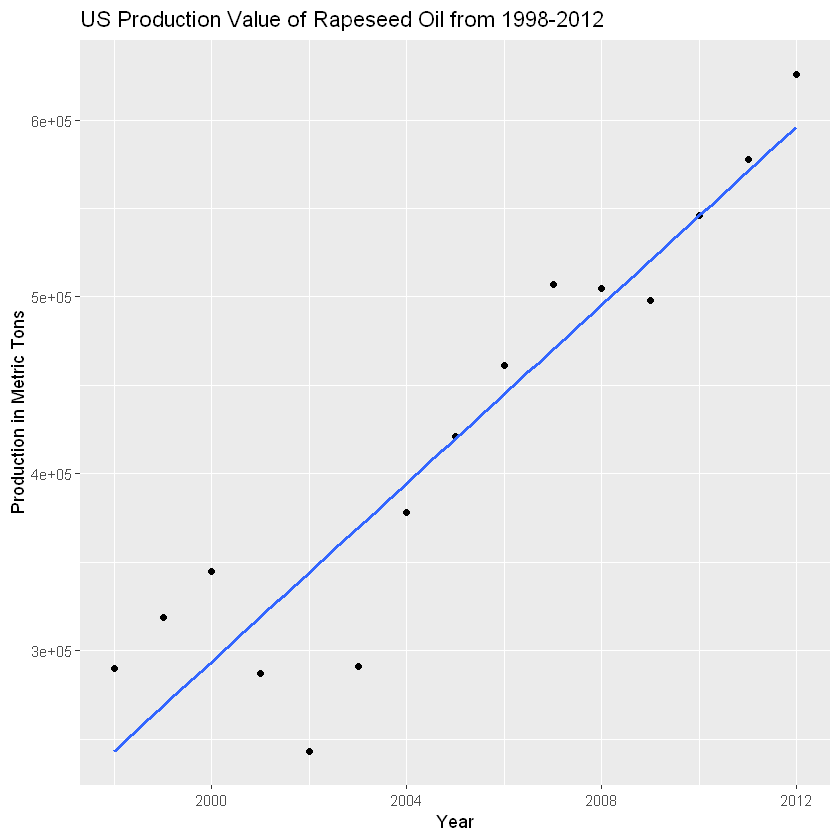

In [142]:
## Creating a scatterplot with best line fit
RapeseedOilTimeSCAT <- ggplot(RapeseedOilTimeLR, aes(x = Year, y = Value))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Rapeseed Oil from 1998-2012')+
                xlab('Year')+
                ylab('Production in Metric Tons')
RapeseedOilTimeSCAT

In [143]:
### We see a positive linear relationship, with Rapeseed Oil production increasing over time

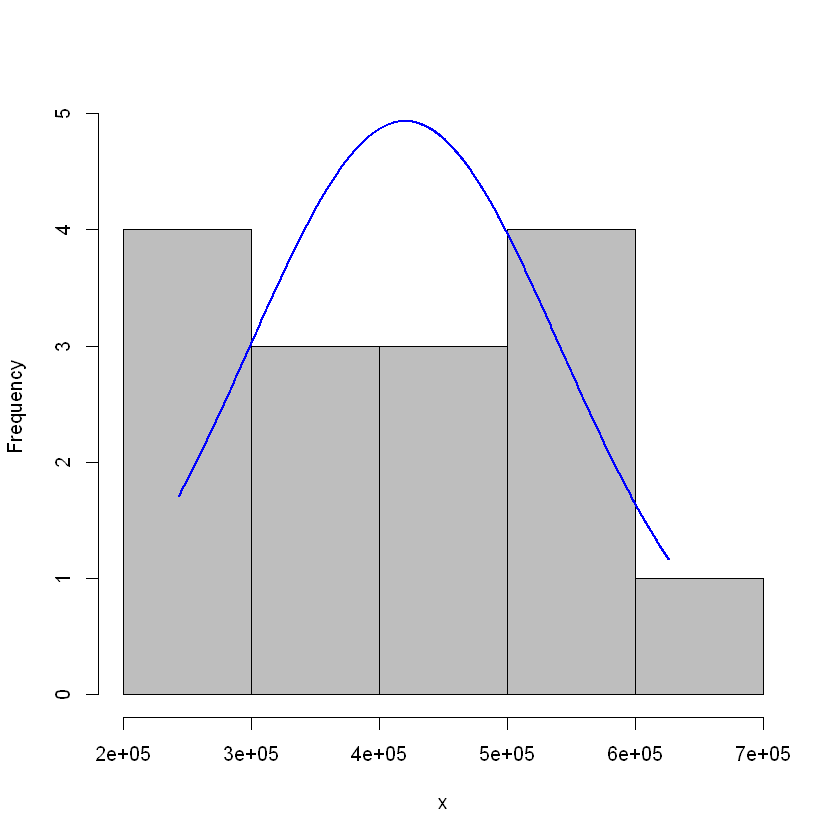

In [144]:
## Testing for Normality
plotNormalHistogram(RapeseedOilTimeLR$Value)

In [145]:
### Looks pretty normal! Great!!

In [146]:
## Looking at Pearson's correlation
cor.test(RapeseedOilTimeLR$Year, RapeseedOilTimeLR$Value, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  x and y
t = 9.0582, df = 13, p-value = 5.597e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7954109 0.9765713
sample estimates:
      cor 
0.9291023 


In [147]:
### Our correlation here is significant, and we can say so with 97.6% confidence!

In [150]:
## Running linear regression model
lin_reg5 <- lm(Value ~ Year, RapeseedOilTimeLR)
print(lin_reg5)


Call:
lm(formula = Value ~ Year, data = RapeseedOilTimeLR)

Coefficients:
(Intercept)         Year  
  -50106333        25200  



In [151]:
### Our linear equation for Rapeseed Oil ~ Time is Rapeseed Oil =  25200(Year) - 50106333

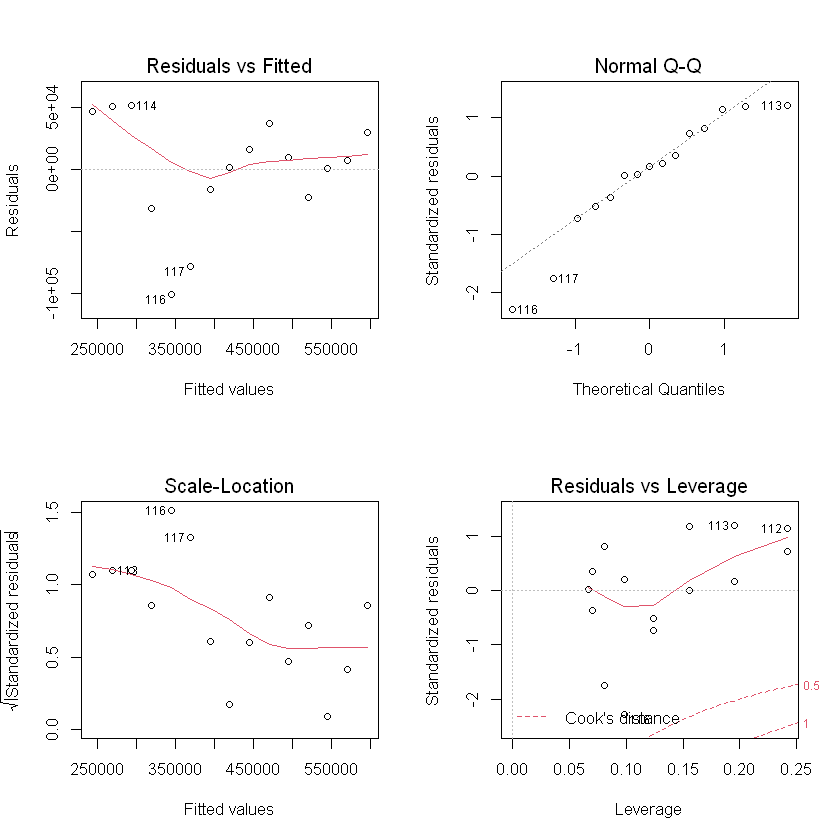

In [238]:
## Testing for Homoscedasticity & Homogeneity of Variance
par(mfrow=c(2,2))
plot(lin_reg5)

In [239]:
### Homogeneity is not looking great, neither is Homoscedasticity

In [240]:
## Running Breusch-Pagan Test 
lmtest::bptest(lin_reg5)


	studentized Breusch-Pagan test

data:  lin_reg5
BP = 3.0153, df = 1, p-value = 0.08248


In [241]:
### Not significant!
## Running NCV Test
car::ncvTest(lin_reg5)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 3.17093, Df = 1, p = 0.07496

In [242]:
### Close call, but neither were significant! Moving onward...

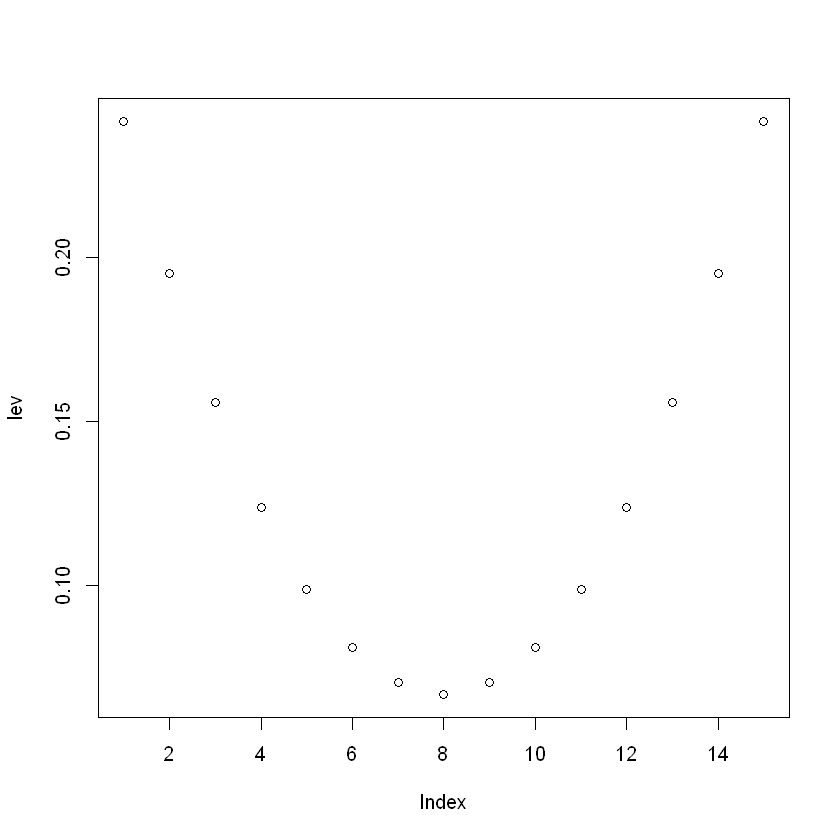

In [243]:
## Screening for Outliers
lev = hat(model.matrix(lin_reg5))
plot(lev)

In [244]:
### Our commodity ~ time regressions are all looking fairly the same with the data spread. Something to look further into?
### Two points are still fairly high, so we will analyze further
summary(influence.measures(lin_reg5))

Potentially influential observations of
	 lm(formula = Value ~ Year, data = RapeseedOilTimeLR) :

    dfb.1_ dfb.Year dffit cov.r   cook.d hat  
116 -0.54   0.54    -0.94  0.47_*  0.29   0.10


In [245]:
### We're making some close calls with these assumptions, but we have passed them!

In [152]:
summary(lin_reg5)


Call:
lm(formula = Value ~ Year, data = RapeseedOilTimeLR)

Residuals:
    Min      1Q  Median      3Q     Max 
-101067  -19467    7133   33433   51333 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -50106333    5577949  -8.983 6.15e-07 ***
Year            25200       2782   9.058 5.60e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 46550 on 13 degrees of freedom
Multiple R-squared:  0.8632,	Adjusted R-squared:  0.8527 
F-statistic: 82.05 on 1 and 13 DF,  p-value: 5.597e-07


In [153]:
### Our summary tells us that the correlation between the Production of Rapeseed Oil and Year is very significant, where year accounts for 85% impact on the production values. 

In [154]:
## - 2 What is the equation of the linear relationship between Rapeseed Oil and honey from 1998-2012?

`geom_smooth()` using formula 'y ~ x'



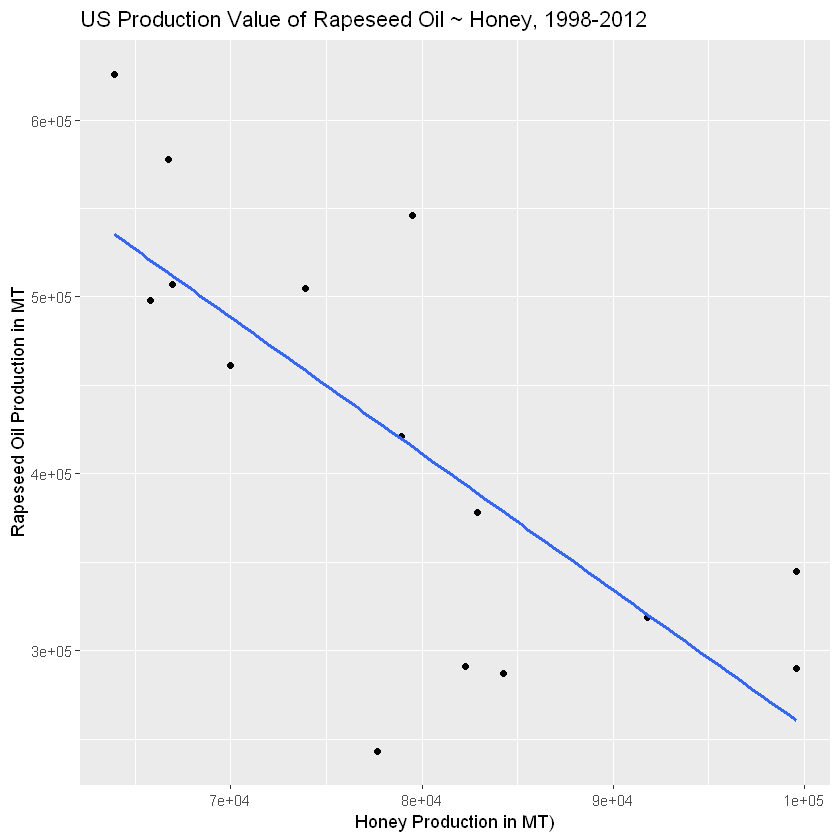

In [155]:
## Creating a scatterplot with best line fit
RapeseedOilHoneySCAT <- ggplot(Nuts_OilsYear, aes(x = Honey, y = RapeseedOil))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Rapeseed Oil ~ Honey, 1998-2012')+
                xlab('Honey Production in MT)')+
                ylab('Rapeseed Oil Production in MT')
RapeseedOilHoneySCAT

In [159]:
### We can see a negative correlation here between Rapeseed Oil and Honey, there is a lot ov variance here, so we will have to see how confident we can be about our accuracy.

In [160]:
## Running Pearson's correlation
cor.test(Nuts_OilsYear$Honey, Nuts_OilsYear$RapeseedOil, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  x and y
t = -3.9034, df = 13, p-value = 0.001814
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9059397 -0.3564485
sample estimates:
       cor 
-0.7345804 


In [161]:
### Just like Walnuts, our correlation is significant, but our confidence interval is low, at 35.6%

In [162]:
## Running linear regression model
lin_reg6 <- lm(RapeseedOil ~ Honey, Nuts_OilsYear)
print(lin_reg6)


Call:
lm(formula = RapeseedOil ~ Honey, data = Nuts_OilsYear)

Coefficients:
(Intercept)        Honey  
  1.028e+06   -7.709e+00  



In [163]:
### Our linear equation for RapeseedOil ~ Honey is Rapeseed Oil = -7.709(Honey) + 1,028,000

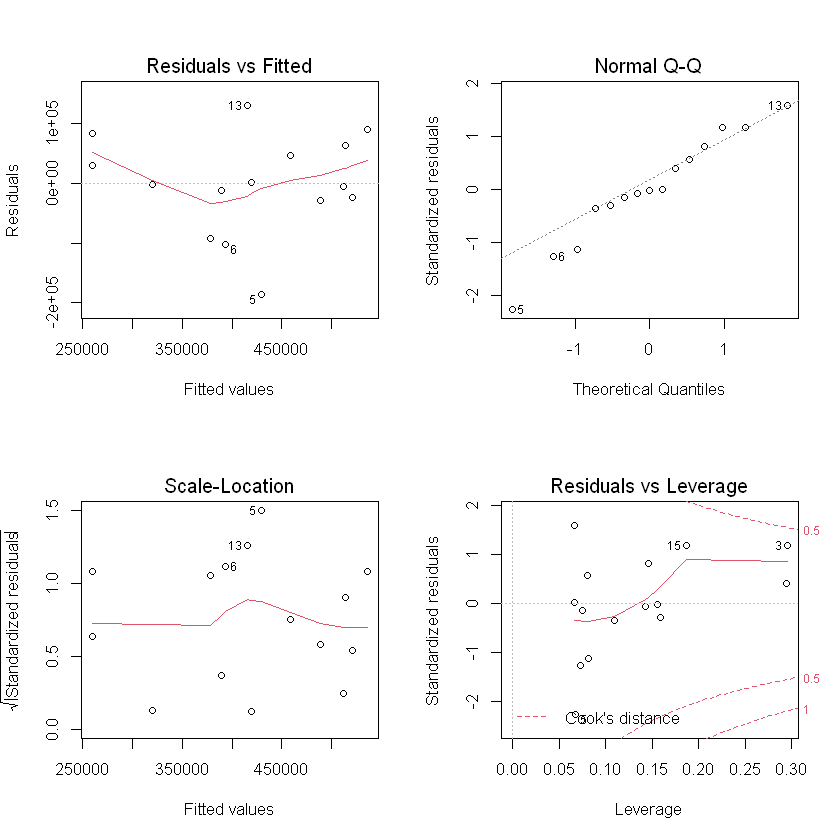

In [246]:
## Testing for Homoscedasticity & Homogeneity of Variance
par(mfrow=c(2,2))
plot(lin_reg6)

In [ ]:
### Homogeneity not the best. Heteroscedasticity is looking better than some of the other models. 

In [247]:
## Breusch-Pagan Test
lmtest::bptest(lin_reg6)


	studentized Breusch-Pagan test

data:  lin_reg6
BP = 0.0015035, df = 1, p-value = 0.9691


In [248]:
### Not significant!
## Running NCV Test
car::ncvTest(lin_reg6)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.001530842, Df = 1, p = 0.96879

In [ ]:
### Also not significant!

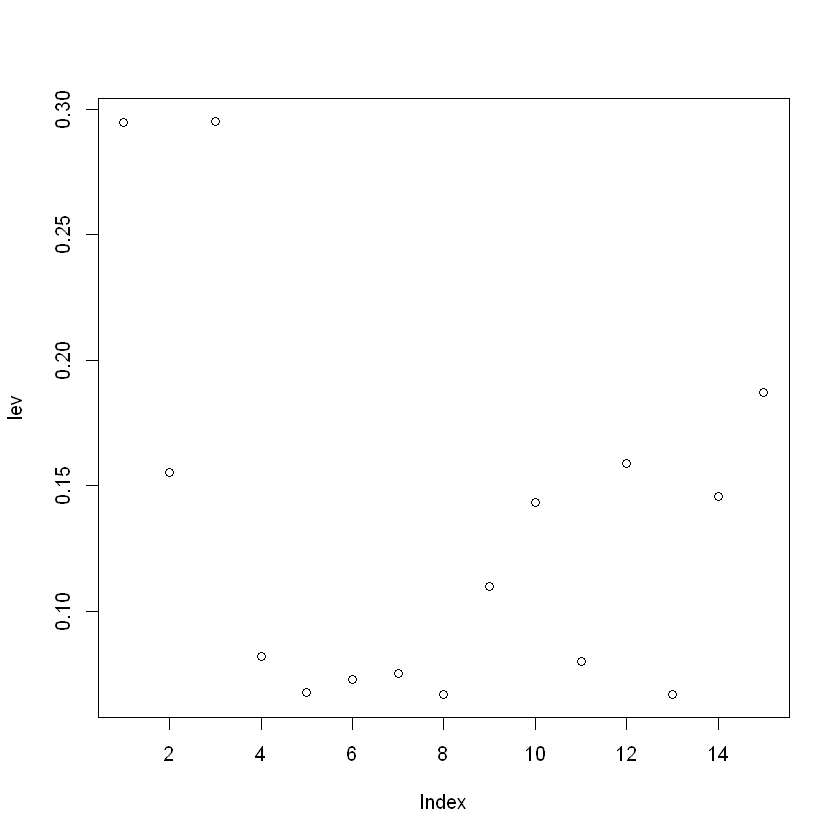

In [249]:
## Screening for Outliers
lev = hat(model.matrix(lin_reg6))
plot(lev)

In [250]:
### Again two high plot points, we'll have to check our DFFITS and DFBETAS scores
summary(influence.measures(lin_reg6))

Potentially influential observations of
	 lm(formula = RapeseedOil ~ Honey, data = Nuts_OilsYear) :

  dfb.1_ dfb.Hony dffit cov.r   cook.d hat  
1 -0.21   0.23     0.26  1.62_*  0.04   0.29
5 -0.19   0.08    -0.75  0.47_*  0.18   0.07


In [251]:
### Nothing over 1! We are good to go.

In [165]:
## Model Summary
summary(lin_reg6)


Call:
lm(formula = RapeseedOil ~ Honey, data = Nuts_OilsYear)

Residuals:
    Min      1Q  Median      3Q     Max 
-186195  -25271   -1364   55730  130894 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.028e+06  1.574e+05   6.531 1.91e-05 ***
Honey       -7.709e+00  1.975e+00  -3.903  0.00181 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 85410 on 13 degrees of freedom
Multiple R-squared:  0.5396,	Adjusted R-squared:  0.5042 
F-statistic: 15.24 on 1 and 13 DF,  p-value: 0.001814


In [166]:
### Although we say this with fairly low confidence, there is a significant correlation between the production of Rapeseed Oil and Honey, where Honey can account for 50% of the production value of Rapeseed Oil on any given year!

In [167]:
# -----------------------------------------------------------------------------------------------------------------
# Running Linear Regressions on Highly Correlated Commodity - Soybean Oil 
## 1 - How do Soybean Oil production values change from 2008-2012?
## 2 - What is the equation of the linear relationship between Soybean Oil and honey from 1998-2012?

In [168]:
## 1 - How do Soybean Oil production values change from 2008-2012?
## Filtering out only Soybean Oil
SoybeanOilTimeLR <- subset(Nuts_Oils, Commodity_Description=='Oil, Soybean')
SoybeanOilTimeLR

,X.1,X,Commodity_Description,Country_Code,Country_Name,Year,Attribute_Description,Unit_Description,Value,Category
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<int>
97,97,374,"Oil, Soybean",US,United States,1998,Production,(MT),8202000,4
98,98,375,"Oil, Soybean",US,United States,1999,Production,(MT),8085000,4
99,99,376,"Oil, Soybean",US,United States,2000,Production,(MT),8355000,4
100,100,377,"Oil, Soybean",US,United States,2001,Production,(MT),8572000,4
101,101,378,"Oil, Soybean",US,United States,2002,Production,(MT),8360000,4
102,102,379,"Oil, Soybean",US,United States,2003,Production,(MT),7748000,4
103,103,1431,"Oil, Soybean",US,United States,2004,Production,(MT),8782000,4
104,104,684,"Oil, Soybean",US,United States,2005,Production,(MT),9250000,4
105,105,7071,"Oil, Soybean",US,United States,2006,Production,(MT),9294000,4


`geom_smooth()` using formula 'y ~ x'



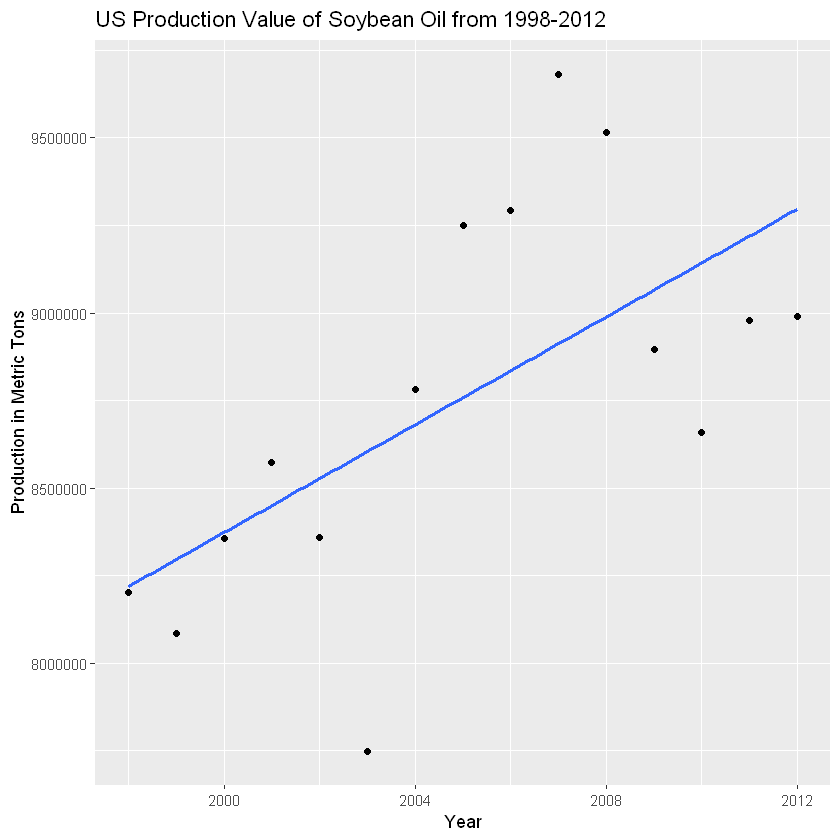

In [169]:
## Creating a scatterplot with best line fit
SoybeanOilTimeSCAT <- ggplot(SoybeanOilTimeLR, aes(x = Year, y = Value))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Soybean Oil from 1998-2012')+
                xlab('Year')+
                ylab('Production in Metric Tons')
SoybeanOilTimeSCAT

In [170]:
### There is a definite trend of increased production over time, but the variance in our scatterplot looks like a cone pattern that we do not want to see. Some adjustment may be needed for this model.

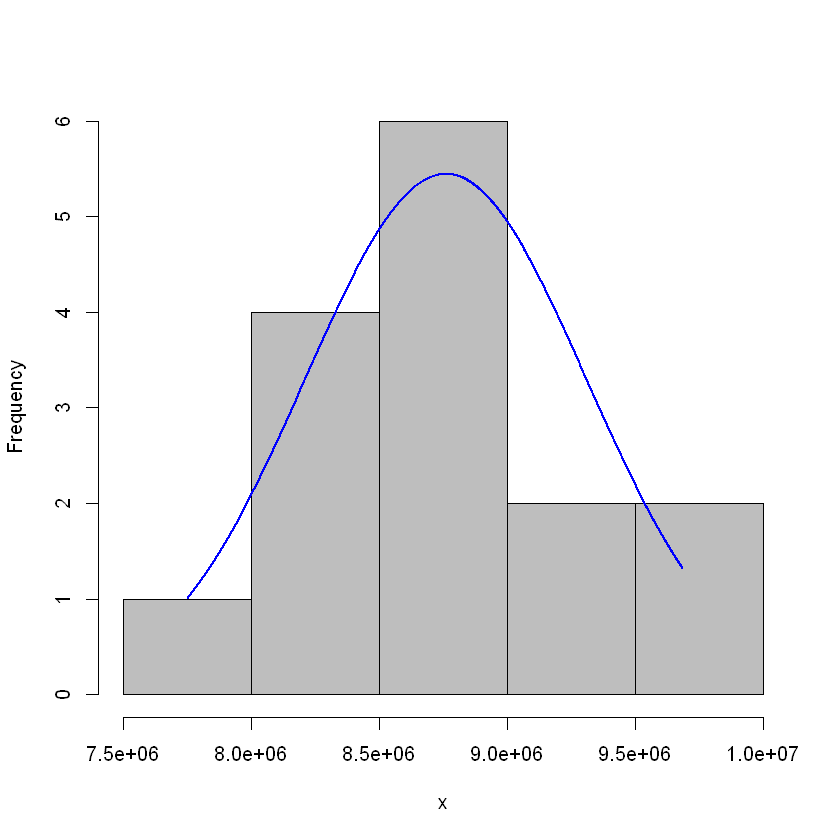

In [171]:
## Testing for Normality
plotNormalHistogram(SoybeanOilTimeLR$Value)

In [172]:
### Our data here looke very normal, great news!

In [173]:
## Looking at Pearson's correlation
cor.test(SoybeanOilTimeLR$Year, SoybeanOilTimeLR$Value, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  x and y
t = 2.897, df = 13, p-value = 0.01248
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1679790 0.8620246
sample estimates:
      cor 
0.6263452 


In [174]:
### Our correlation is significant! We can be 86% confident that year impacts the production value of Soybean oil!

In [175]:
## Running linear regression model
lin_reg7 <- lm(Value ~ Year, SoybeanOilTimeLR)
print(lin_reg7)


Call:
lm(formula = Value ~ Year, data = SoybeanOilTimeLR)

Coefficients:
(Intercept)         Year  
 -145498174        76936  



In [177]:
### Our Soybean Oil ~ Time equation is: Soybean Oil = 76,936(Year) - 145,498,174

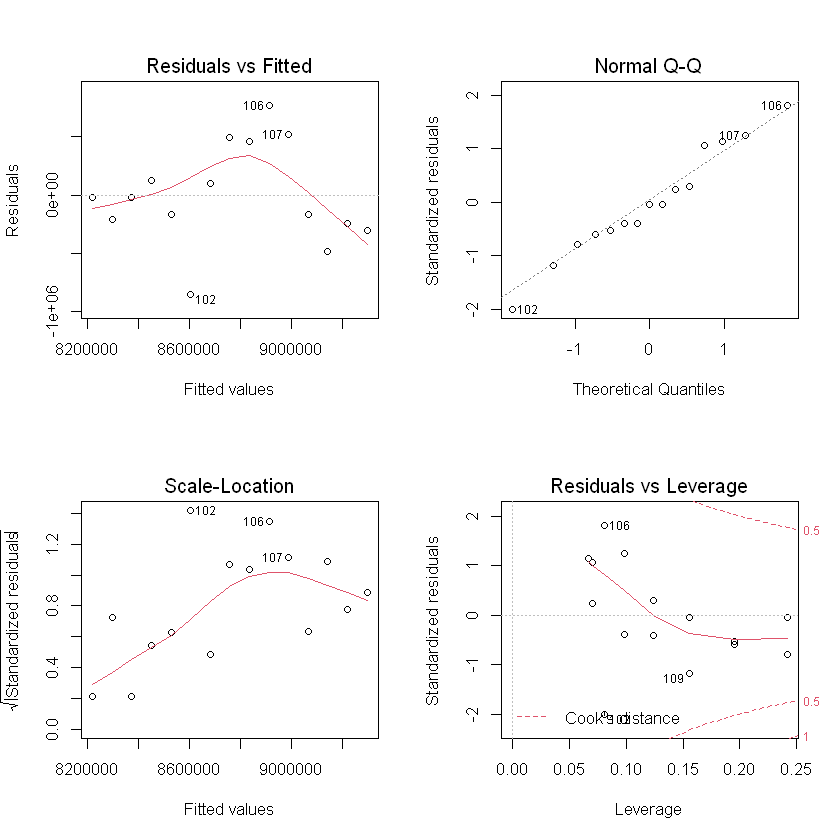

In [252]:
## Testing for Homoscedasticity & Homogeneity of Variance
par(mfrow=c(2,2))
plot(lin_reg7)

In [253]:
### Again Homogeneity not great. Looks like something we would have to definitely adjust if this were a high-stakes project. 
### Heteroscedasticity is not great either, but hopefully we will pass our tests, like with the others. 

In [254]:
## Breusch-Pagan Test
lmtest::bptest(lin_reg7)


	studentized Breusch-Pagan test

data:  lin_reg7
BP = 0.52653, df = 1, p-value = 0.4681


In [255]:
### Not significant!
## Running NCV Test
car::ncvTest(lin_reg7)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.4191224, Df = 1, p = 0.51738

In [ ]:
### Also not significant!

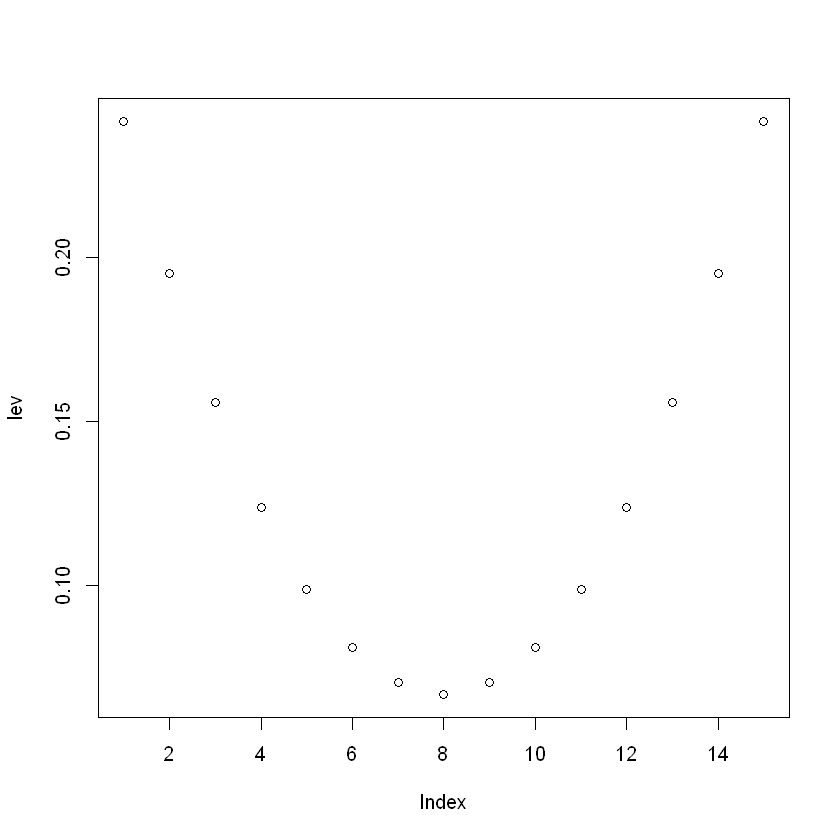

In [256]:
## Screening for Outliers
lev = hat(model.matrix(lin_reg7))
plot(lev)

In [257]:
### Again, the sime time regression spread as all the others, with two outliers at either end of the u pattern
summary(influence.measures(lin_reg7))

Potentially influential observations of
	 lm(formula = Value ~ Year, data = SoybeanOilTimeLR) :

   dfb.1_ dfb.Year dffit cov.r   cook.d hat  
97 -0.02   0.02    -0.02  1.55_*  0.00   0.24


In [258]:
### Nothing over one, moving forward!

In [178]:
## Model Summary
summary(lin_reg7)


Call:
lm(formula = Value ~ Year, data = SoybeanOilTimeLR)

Residuals:
    Min      1Q  Median      3Q     Max 
-856062 -225933  -18255  290470  770195 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -145498174   53247547  -2.732   0.0171 *
Year             76936      26557   2.897   0.0125 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 444400 on 13 degrees of freedom
Multiple R-squared:  0.3923,	Adjusted R-squared:  0.3456 
F-statistic: 8.392 on 1 and 13 DF,  p-value: 0.01248


In [179]:
### Our values are significant, the summary tells us that year can account for 35% of the production value of Soybean Oil.

In [180]:
## - 2 What is the equation of the linear relationship between Rapeseed Oil and honey from 1998-2012?

`geom_smooth()` using formula 'y ~ x'



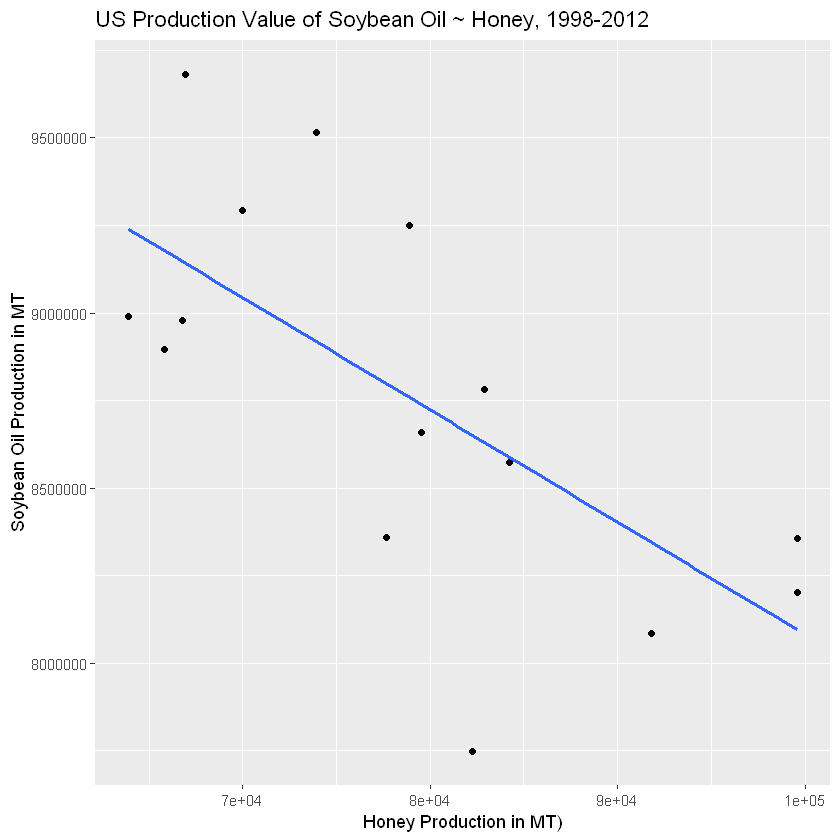

In [181]:
## Creating a scatterplot with best line fit
SoybeanOilHoneySCAT <- ggplot(Nuts_OilsYear, aes(x = Honey, y = SoybeanOil))+ 
                geom_point() + geom_smooth(method=lm, se=FALSE)+
                ggtitle('US Production Value of Soybean Oil ~ Honey, 1998-2012')+
                xlab('Honey Production in MT)')+
                ylab('Soybean Oil Production in MT')
SoybeanOilHoneySCAT

In [182]:
### We are getting a negative correlation between the production values of Honey and Soybean Oil, with a lot of variance between individual plots.

In [183]:
## Running Pearson's correlation
cor.test(Nuts_OilsYear$Honey, Nuts_OilsYear$SoybeanOil, method="pearson", use = "complete.obs")


	Pearson's product-moment correlation

data:  x and y
t = -3.2941, df = 13, p-value = 0.005813
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8820123 -0.2478986
sample estimates:
       cor 
-0.6745064 


In [184]:
### P-value is significant, but our confidence interval is very low. 

In [185]:
## Running linear regression model
lin_reg8 <- lm(SoybeanOil ~ Honey, Nuts_OilsYear)
print(lin_reg8)


Call:
lm(formula = SoybeanOil ~ Honey, data = Nuts_OilsYear)

Coefficients:
(Intercept)        Honey  
  1.129e+07   -3.206e+01  



In [186]:
### Our Soybean Oil ~ Honey equation is: Soybean Oil = -32.06(Honey) + 11,290,000

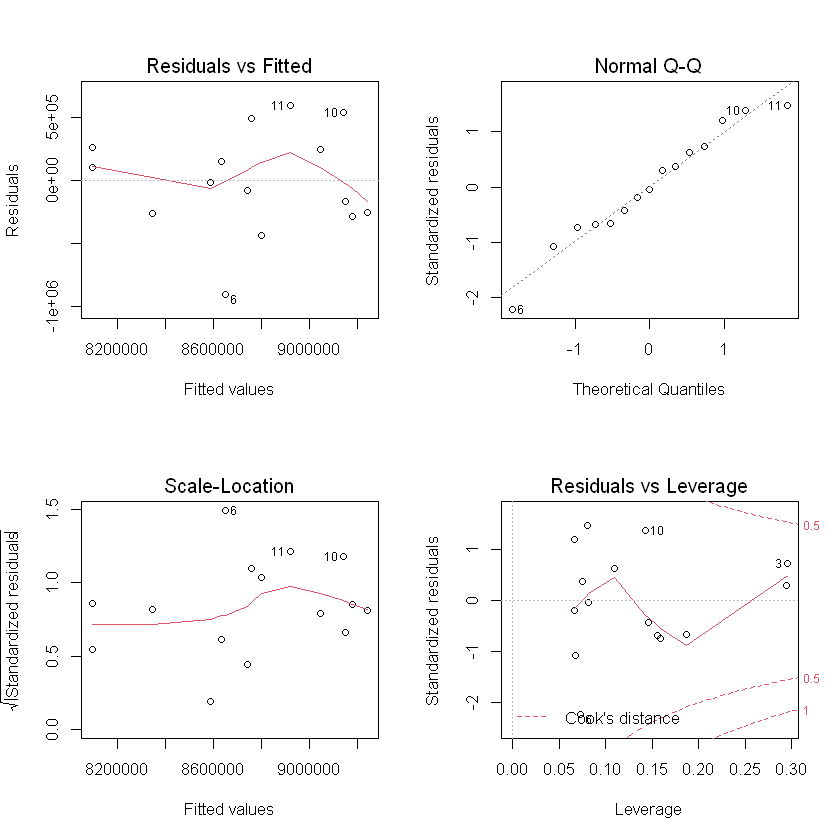

In [259]:
## Testing for Homoscedasticity & Homogeneity of Variance
par(mfrow=c(2,2))
plot(lin_reg8)

In [260]:
### Another issue with homogeneity here!
### Looking further into Heteroscedasticity

In [261]:
## Breusch-Pagan Test
lmtest::bptest(lin_reg8)


	studentized Breusch-Pagan test

data:  lin_reg8
BP = 0.11695, df = 1, p-value = 0.7324


In [262]:
### Not significant!
## Running NCV Test
car::ncvTest(lin_reg8)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.1061092, Df = 1, p = 0.74462

In [263]:
### Not significant either!

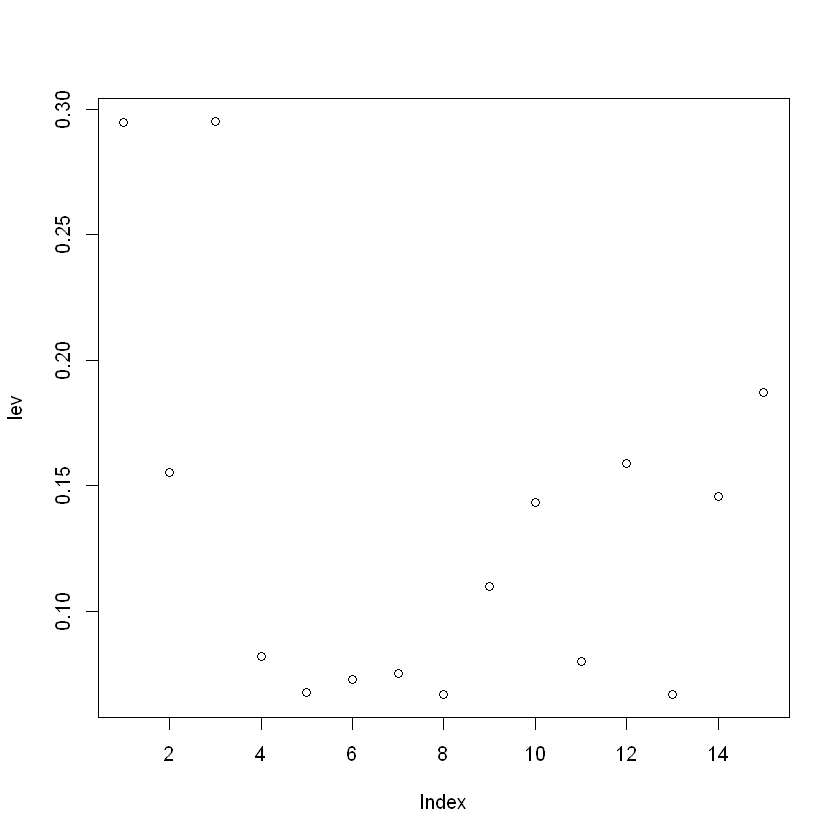

In [264]:
## Screening for Outliers
lev = hat(model.matrix(lin_reg8))
plot(lev)

In [265]:
### Two high outliers, all the honey regressions look similar. Let's look further into it...
summary(influence.measures(lin_reg8))

Potentially influential observations of
	 lm(formula = SoybeanOil ~ Honey, data = Nuts_OilsYear) :

  dfb.1_ dfb.Hony dffit cov.r   cook.d hat  
1 -0.15   0.16     0.19  1.64_*  0.02   0.29
3 -0.38   0.41     0.47  1.53_*  0.11   0.30
6  0.11  -0.22    -0.76  0.48_*  0.19   0.07


In [266]:
### Nothing over one so we can get to the summary!

In [187]:
## Model Summary
summary(lin_reg8)


Call:
lm(formula = SoybeanOil ~ Honey, data = Nuts_OilsYear)

Residuals:
    Min      1Q  Median      3Q     Max 
-902586 -254502  -14952  254271  595850 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.129e+07  7.757e+05  14.552 2.01e-09 ***
Honey       -3.206e+01  9.732e+00  -3.294  0.00581 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 420900 on 13 degrees of freedom
Multiple R-squared:  0.455,	Adjusted R-squared:  0.413 
F-statistic: 10.85 on 1 and 13 DF,  p-value: 0.005813


In [188]:
### To summarize the analysis, with low confidence, we can conclude that honey production significantly impacts the production of Soybean oil by 41%

In [45]:
### Analysis To Be Continued...

In [82]:
# ------------------------------------------------------------------------------
## Converting MT measurements to 1000 MT measurements
Nuts_OilsMTconv <- mutate(Nuts_Oils2, Value = Value / 1000)
Nuts_OilsMTconv

Commodity_Description,Year,Value
<chr>,<int>,<dbl>
"Walnuts, Inshell Basis",1998,205.931
"Walnuts, Inshell Basis",1999,256.734
"Walnuts, Inshell Basis",2000,216.816
"Walnuts, Inshell Basis",2001,276.700
"Walnuts, Inshell Basis",2002,255.825
"Walnuts, Inshell Basis",2003,295.741
"Walnuts, Inshell Basis",2004,294.834
"Walnuts, Inshell Basis",2005,322.100
"Walnuts, Inshell Basis",2006,317.515


In [60]:
## Pivoting df for stepwise regression
RegReady <- Nuts_OilsMTconv %>% pivot_wider(names_from = Commodity_Description, values_from = Value)
RegReady

Year,"Walnuts, Inshell Basis","Pistachios, Inshell Basis","Pecans, Inshell Basis","Macadamia, Inshell Basis","Filberts, Inshell Basis","Almonds, Shelled Basis","Oil, Sunflowerseed","Oil, Soybean","Oil, Rapeseed","Oil, Peanut","Oil, Olive","Oil, Cottonseed",Honey
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1998,205.931,85.275,66.467,26.082,14.061,235.884,534,8202,290,66,1,377,99.57162
1999,256.734,56.056,184.189,25.628,34.500,377.800,478,8085,319,104,1,426,91.80072
2000,216.816,110.179,95.076,22.680,20.471,318.900,396,8355,345,81,1,384,99.58931
2001,276.700,73.240,153.567,24.494,44.906,376.500,319,8572,287,104,1,398,84.25344
2002,255.825,137.562,83.721,24.040,17.700,494.416,145,8360,243,130,1,329,77.68409
2003,295.741,53.970,127.958,24.040,34.400,471.740,270,7748,291,79,2,396,82.26853
2004,294.834,157.400,84.277,25.628,48.502,462.664,120,8782,378,57,2,434,82.88405
2005,322.100,128.400,127.110,27.216,33.566,415.040,251,9250,421,82,3,435,78.91060
2006,317.515,107.955,313.890,26.300,39.010,508.023,294,9294,461,97,1,408,69.96081


In [66]:
## Omitting missing values
RegReady <- select(RegReady, -c('Pecans, Inshell Basis', 'Macadamia, Inshell Basis'))
RegReady

Year,"Walnuts, Inshell Basis","Pistachios, Inshell Basis","Filberts, Inshell Basis","Almonds, Shelled Basis","Oil, Sunflowerseed","Oil, Soybean","Oil, Rapeseed","Oil, Peanut","Oil, Olive","Oil, Cottonseed",Honey
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1998,205.931,85.275,14.061,235.884,534,8202,290,66,1,377,99.57162
1999,256.734,56.056,34.500,377.800,478,8085,319,104,1,426,91.80072
2000,216.816,110.179,20.471,318.900,396,8355,345,81,1,384,99.58931
2001,276.700,73.240,44.906,376.500,319,8572,287,104,1,398,84.25344
2002,255.825,137.562,17.700,494.416,145,8360,243,130,1,329,77.68409
2003,295.741,53.970,34.400,471.740,270,7748,291,79,2,396,82.26853
2004,294.834,157.400,48.502,462.664,120,8782,378,57,2,434,82.88405
2005,322.100,128.400,33.566,415.040,251,9250,421,82,3,435,78.91060
2006,317.515,107.955,39.010,508.023,294,9294,461,97,1,408,69.96081


In [67]:
## Continued Analysis - Stepwise Regression
# How do other commodities influence honey production?
FitAll = lm(Honey ~ ., data = RegReady)

summary(FitAll)


Call:
lm(formula = Honey ~ ., data = RegReady)

Residuals:
      1       2       3       4       5       6       7       8       9      10 
-1.9848 -1.2527  2.5934  2.5002 -1.3096  1.2593 -1.3504  0.3318 -1.8634  1.5521 
     11      12      13      14      15 
 0.2196 -1.3198  1.1497 -0.1064 -0.4191 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)  
(Intercept)                  1.761e+04  4.267e+03   4.126   0.0258 *
Year                        -8.732e+00  2.127e+00  -4.106   0.0262 *
`Walnuts, Inshell Basis`     1.795e-01  5.487e-02   3.272   0.0467 *
`Pistachios, Inshell Basis` -3.990e-02  5.058e-02  -0.789   0.4878  
`Filberts, Inshell Basis`   -2.190e-01  1.666e-01  -1.314   0.2802  
`Almonds, Shelled Basis`    -2.402e-02  2.101e-02  -1.143   0.3358  
`Oil, Sunflowerseed`        -6.672e-02  2.863e-02  -2.330   0.1021  
`Oil, Soybean`              -5.440e-03  4.237e-03  -1.284   0.2894  
`Oil, Rapeseed`              1.843e-01  7.551e-02   2.441   

In [68]:
### P-value is significant, but most of the individual commodities are not displaying as significant.

In [81]:
## Beginning process of elimination to determine best fit
step(FitAll, direction = 'backward')

Start:  AIC=35.78
Honey ~ Year + `Walnuts, Inshell Basis` + `Pistachios, Inshell Basis` + 
    `Filberts, Inshell Basis` + `Almonds, Shelled Basis` + `Oil, Sunflowerseed` + 
    `Oil, Soybean` + `Oil, Rapeseed` + `Oil, Peanut` + `Oil, Olive` + 
    `Oil, Cottonseed`

                              Df Sum of Sq     RSS    AIC
- `Oil, Olive`                 1     0.047  32.948 33.803
<none>                                      32.900 35.781
- `Pistachios, Inshell Basis`  1     6.825  39.726 36.609
- `Almonds, Shelled Basis`     1    14.337  47.238 39.207
- `Oil, Cottonseed`            1    15.385  48.285 39.536
- `Oil, Soybean`               1    18.074  50.974 40.349
- `Filberts, Inshell Basis`    1    18.946  51.846 40.603
- `Oil, Peanut`                1    47.645  80.545 47.212
- `Oil, Sunflowerseed`         1    59.556  92.456 49.280
- `Oil, Rapeseed`              1    65.354  98.254 50.193
- `Walnuts, Inshell Basis`     1   117.424 150.324 56.571
- Year                         1   1


Call:
lm(formula = Honey ~ Year + `Walnuts, Inshell Basis` + `Pistachios, Inshell Basis` + 
    `Filberts, Inshell Basis` + `Almonds, Shelled Basis` + `Oil, Sunflowerseed` + 
    `Oil, Soybean` + `Oil, Rapeseed` + `Oil, Peanut` + `Oil, Cottonseed`, 
    data = RegReady)

Coefficients:
                (Intercept)                         Year  
                  1.762e+04                   -8.741e+00  
   `Walnuts, Inshell Basis`  `Pistachios, Inshell Basis`  
                  1.800e-01                   -4.109e-02  
  `Filberts, Inshell Basis`     `Almonds, Shelled Basis`  
                 -2.186e-01                   -2.424e-02  
       `Oil, Sunflowerseed`               `Oil, Soybean`  
                 -6.674e-02                   -5.279e-03  
            `Oil, Rapeseed`                `Oil, Peanut`  
                  1.837e-01                   -1.555e-01  
          `Oil, Cottonseed`  
                 -1.248e-01  


In [79]:
## Looking at the summary for this model
BackElim = lm(Honey ~ Year + `Walnuts, Inshell Basis` + `Pistachios, Inshell Basis` + 
    `Filberts, Inshell Basis` + `Almonds, Shelled Basis` + `Oil, Sunflowerseed` + 
    `Oil, Soybean` + `Oil, Rapeseed` + `Oil, Peanut` + `Oil, Cottonseed`, RegReady)
summary(BackElim)


Call:
lm(formula = Honey ~ Year + `Walnuts, Inshell Basis` + `Pistachios, Inshell Basis` + 
    `Filberts, Inshell Basis` + `Almonds, Shelled Basis` + `Oil, Sunflowerseed` + 
    `Oil, Soybean` + `Oil, Rapeseed` + `Oil, Peanut` + `Oil, Cottonseed`, 
    data = RegReady)

Residuals:
      1       2       3       4       5       6       7       8       9      10 
-2.0618 -1.1834  2.6189  2.4478 -1.2876  1.2465 -1.3313  0.2482 -1.8122  1.5976 
     11      12      13      14      15 
 0.2240 -1.3022  1.2335 -0.1042 -0.5339 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  1.762e+04  3.691e+03   4.775  0.00881 **
Year                        -8.741e+00  1.839e+00  -4.752  0.00896 **
`Walnuts, Inshell Basis`     1.800e-01  4.717e-02   3.816  0.01885 * 
`Pistachios, Inshell Basis` -4.109e-02  4.093e-02  -1.004  0.37229   
`Filberts, Inshell Basis`   -2.186e-01  1.443e-01  -1.515  0.20441   
`Almonds, Shelled Basis`    -2.424e-0

In [84]:
round(BackElim$coefficients, 2)

(Intercept)                        Year 
                   17624.85                       -8.74 
   `Walnuts, Inshell Basis` `Pistachios, Inshell Basis` 
                       0.18                       -0.04 
  `Filberts, Inshell Basis`    `Almonds, Shelled Basis` 
                      -0.22                       -0.02 
       `Oil, Sunflowerseed`              `Oil, Soybean` 
                      -0.07                       -0.01 
            `Oil, Rapeseed`               `Oil, Peanut` 
                       0.18                       -0.16 
          `Oil, Cottonseed` 
                      -0.12

In [70]:
## Running Forward elimination

In [71]:
## Creating new baseline model
fitstart = lm(Honey ~ 1, data = RegReady)

summary(fitstart)


Call:
lm(formula = Honey ~ 1, data = RegReady)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0061 -10.4600  -0.0095   4.6487  20.6692 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   78.920      2.984   26.45 2.37e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.56 on 14 degrees of freedom


In [72]:
## Beggining Forward Selection 
step(fitstart, direction = 'forward', scope = (formula(FitAll)))

Start:  AIC=74.39
Honey ~ 1

                              Df Sum of Sq     RSS    AIC
+ Year                         1   1412.18  457.91 55.279
+ `Almonds, Shelled Basis`     1   1236.46  633.64 60.151
+ `Walnuts, Inshell Basis`     1   1029.93  840.17 64.383
+ `Oil, Rapeseed`              1   1009.12  860.98 64.750
+ `Oil, Soybean`               1    850.82 1019.28 67.282
+ `Pistachios, Inshell Basis`  1    744.39 1125.71 68.772
+ `Oil, Olive`                 1    591.45 1278.65 70.683
+ `Oil, Sunflowerseed`         1    554.83 1315.27 71.106
+ `Filberts, Inshell Basis`    1    429.99 1440.11 72.466
<none>                                     1870.10 74.385
+ `Oil, Peanut`                1     64.74 1805.36 75.857
+ `Oil, Cottonseed`            1     39.91 1830.18 76.062

Step:  AIC=55.28
Honey ~ Year

                              Df Sum of Sq    RSS    AIC
+ `Walnuts, Inshell Basis`     1   117.302 340.61 52.840
+ `Oil, Rapeseed`              1    72.462 385.45 54.696
+ `Filberts, I


Call:
lm(formula = Honey ~ Year + `Walnuts, Inshell Basis` + `Oil, Peanut` + 
    `Filberts, Inshell Basis` + `Pistachios, Inshell Basis` + 
    `Oil, Rapeseed` + `Oil, Sunflowerseed` + `Oil, Soybean`, 
    data = RegReady)

Coefficients:
                (Intercept)                         Year  
                  1.444e+04                   -7.173e+00  
   `Walnuts, Inshell Basis`                `Oil, Peanut`  
                  1.421e-01                   -1.519e-01  
  `Filberts, Inshell Basis`  `Pistachios, Inshell Basis`  
                 -3.410e-01                   -5.569e-03  
            `Oil, Rapeseed`         `Oil, Sunflowerseed`  
                  1.026e-01                   -4.012e-02  
             `Oil, Soybean`  
                 -3.584e-03  


In [73]:
## Examining Final Model for Forward Selection
fitsome2 = lm(Honey ~ Year + `Walnuts, Inshell Basis` + `Oil, Peanut` + `Filberts, Inshell Basis` + 
    `Pistachios, Inshell Basis` + `Oil, Rapeseed` + `Oil, Sunflowerseed` + 
    `Oil, Soybean`, data = RegReady)
summary(fitsome2)


Call:
lm(formula = Honey ~ Year + `Walnuts, Inshell Basis` + `Oil, Peanut` + 
    `Filberts, Inshell Basis` + `Pistachios, Inshell Basis` + 
    `Oil, Rapeseed` + `Oil, Sunflowerseed` + `Oil, Soybean`, 
    data = RegReady)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9488 -0.9630 -0.3666  0.2659  4.7163 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)   
(Intercept)                  1.444e+04  2.432e+03   5.936  0.00102 **
Year                        -7.173e+00  1.221e+00  -5.874  0.00108 **
`Walnuts, Inshell Basis`     1.421e-01  3.973e-02   3.576  0.01169 * 
`Oil, Peanut`               -1.519e-01  4.816e-02  -3.155  0.01970 * 
`Filberts, Inshell Basis`   -3.410e-01  1.169e-01  -2.916  0.02677 * 
`Pistachios, Inshell Basis` -5.569e-03  3.368e-02  -0.165  0.87411   
`Oil, Rapeseed`              1.026e-01  3.842e-02   2.671  0.03696 * 
`Oil, Sunflowerseed`        -4.012e-02  1.771e-02  -2.266  0.06405 . 
`Oil, Soybean`              -3.584e-

In [75]:
### So far backward elimination makes more sense, and also seems more credible given the AIC is lower than the final model for Forward selection

In [77]:
## Trying Hybrid Selection
step(fitstart, direction='both', scope=formula(FitAll))

Start:  AIC=74.39
Honey ~ 1

                              Df Sum of Sq     RSS    AIC
+ Year                         1   1412.18  457.91 55.279
+ `Almonds, Shelled Basis`     1   1236.46  633.64 60.151
+ `Walnuts, Inshell Basis`     1   1029.93  840.17 64.383
+ `Oil, Rapeseed`              1   1009.12  860.98 64.750
+ `Oil, Soybean`               1    850.82 1019.28 67.282
+ `Pistachios, Inshell Basis`  1    744.39 1125.71 68.772
+ `Oil, Olive`                 1    591.45 1278.65 70.683
+ `Oil, Sunflowerseed`         1    554.83 1315.27 71.106
+ `Filberts, Inshell Basis`    1    429.99 1440.11 72.466
<none>                                     1870.10 74.385
+ `Oil, Peanut`                1     64.74 1805.36 75.857
+ `Oil, Cottonseed`            1     39.91 1830.18 76.062

Step:  AIC=55.28
Honey ~ Year

                              Df Sum of Sq     RSS    AIC
+ `Walnuts, Inshell Basis`     1    117.30  340.61 52.840
+ `Oil, Rapeseed`              1     72.46  385.45 54.696
+ `Filberts


Call:
lm(formula = Honey ~ Year + `Walnuts, Inshell Basis` + `Oil, Peanut` + 
    `Filberts, Inshell Basis` + `Oil, Rapeseed` + `Oil, Sunflowerseed` + 
    `Oil, Soybean`, data = RegReady)

Coefficients:
              (Intercept)                       Year  
                1.439e+04                 -7.147e+00  
 `Walnuts, Inshell Basis`              `Oil, Peanut`  
                1.423e-01                 -1.514e-01  
`Filberts, Inshell Basis`            `Oil, Rapeseed`  
               -3.302e-01                  9.888e-02  
     `Oil, Sunflowerseed`             `Oil, Soybean`  
               -3.841e-02                 -3.437e-03  


In [85]:
### Looking at hybrid, I would elect to go with our backward elimination model for our Stepwise Regression Analysis because it has the lowest AIC. 